In [1]:
# load the necessary packages  
import time
start_time = time.time()  
import numpy as np    
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn import preprocessing 
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
import scipy.stats as stats 
from scipy.stats import zscore 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from hyperopt import hp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe  
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import Normalizer   
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
xgb.set_config (verbosity=0)
from xgboost import XGBClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn import svm 
import statsmodels.formula.api as sm
import math 
from collections import Counter
random_state = np.random.RandomState(0) 
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample 
from numpy import array
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import binarize 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from scipy.stats import randint as sp_randint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
import joblib
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Domain: Semi Conductor Manufacturing Process 

In [3]:
# Q 1(A) 
# Import ‘signal-data.csv’ as DataFrame

In [4]:
# Solution 
Signal_Data_csv = pd.read_csv ('signal-data.csv')
Signal_Data = pd.DataFrame(Signal_Data_csv) 

In [5]:
Signal_Data.shape

(1567, 592)

In [6]:
Signal_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
# Renaming the features of the dataset 
Signal_Data.columns  = 'feature_' + Signal_Data.columns 

# Renaming the Time and Pass/Fail columns as they are not features/signals
Signal_Data.rename(columns = {'feature_Time':'Time'}, inplace = True) 
Signal_Data.rename(columns = {'feature_Pass/Fail':'Pass/Fail'}, inplace = True)

In [8]:
# Q 1(B) 
# Print 5 point summary and share at least 2 observations. 

In [9]:
Signal_Data.drop(['Time','Pass/Fail'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature_0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
feature_1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
feature_2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
feature_3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
feature_4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
feature_585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
feature_586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
feature_587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
feature_588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


In [10]:
# Observations 
# 1. Some features like 9, 10, 21, 23, 24 etc have negative observations/datapoints
# 2. The dataset may have some Features with outliers as a significant difference between their 3rd quartile (75%) value 
# and Maximum value is discernible 

In [11]:
# Q 2(A) 
# Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [12]:
# Solution 
# Maximum Null Value 
Signal_Data.isnull().sum().max()

1429

In [13]:
# Total number of observations per feature: # 1567
# 20% of observations 
0.2*1567

313.40000000000003

In [14]:
# Our objective is to remove all features with > 313 null values 
for col in Signal_Data:
    if Signal_Data[col].isnull().sum() > 313:
        Signal_Data = Signal_Data.drop(col, axis=1)

In [15]:
# Maximum Null Value post removal of features with > 313 null values 
Signal_Data.isnull().sum().max()

273

In [16]:
# Detecting Blank values in the dataset
Signal_Data = Signal_Data.replace(r'^\s*$', np.nan, regex=True)
Signal_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


In [17]:
Signal_Data.isnull().sum().max()

273

In [18]:
Signal_Data.isnull().sum()

Time            0
feature_0       6
feature_1       7
feature_2      14
feature_3      14
               ..
feature_586     1
feature_587     1
feature_588     1
feature_589     1
Pass/Fail       0
Length: 560, dtype: int64

In [19]:
# Shape of the dataframe post dropping of columns with 20%+ Null values
Signal_Data.shape

(1567, 560)

In [20]:
Signal_Data = Signal_Data.drop(['Time'], axis=1)

In [21]:
Signal_Data.shape

(1567, 559)

In [22]:
# Imputation of missing values by Mean of the feature 
imputer = SimpleImputer(strategy='mean', missing_values=np.nan) 
Signal_Data_New = pd.DataFrame(imputer.fit_transform(Signal_Data))
Signal_Data_New.columns = Signal_Data.columns
Signal_Data_New.index = Signal_Data.index

In [23]:
# Detecting missing value post Imputation 
Signal_Data_New.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_586    0
feature_587    0
feature_588    0
feature_589    0
Pass/Fail      0
Length: 559, dtype: int64

In [24]:
Signal_Data_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 559 entries, feature_0 to Pass/Fail
dtypes: float64(559)
memory usage: 6.7 MB


In [25]:
# Q 2(B) 
# Identify and drop the features which are having same value for all the rows.

In [26]:
# Solution by three methods 

In [27]:
# Method 1
Signal_Data_New = Signal_Data_New[[i for i in Signal_Data_New if len(set(Signal_Data_New[i]))>1]]

In [28]:
Signal_Data_New.shape

(1567, 443)

In [29]:
# Method 2
Signal_Data_New = Signal_Data_New[[i for i in Signal_Data_New if Signal_Data_New[i].nunique()>1]]

In [30]:
Signal_Data_New.shape

(1567, 443)

In [31]:
# Method 3
nunique = Signal_Data_New.nunique()
cols_to_drop = nunique[nunique == 1].index
Signal_Data_New.drop(cols_to_drop, axis=1).shape

(1567, 443)

In [32]:
# ALl the 3 methods yield the same results. 

In [33]:
# Q 2(C)  
# Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [34]:
# Some of the Signals from Sensors are found to be negative. A sensor is expected to generate only positive signal. 
# Negative signal indicates that the sensor is faulty. 
# Hence, we will drop the features/signals with negative observations. 

In [35]:
Signal_Data_New_2 = Signal_Data_New.drop (['Pass/Fail'], axis =1)

In [36]:
# Remove columns with negative values 
Signal_Data_New_2 = Signal_Data_New_2.drop(columns=Signal_Data_New_2.columns[(Signal_Data_New_2 < 0).any()])

In [37]:
Signal_Data_New_2.shape   

(1567, 408)

In [38]:
Signal_Data_New_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 408 entries, feature_0 to feature_589
dtypes: float64(408)
memory usage: 4.9 MB


In [39]:
# Q 2(D)
# Check for multi-collinearity in the data and take necessary action

In [40]:
# Solution
# Detecting multicollinearity in features using Variance Inflation Factor   
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Independent variables 
X = Signal_Data_New_2
  
# VIF dataframe 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

         feature            VIF
0      feature_0   23604.233665
1      feature_1    9305.675361
2      feature_2  147166.248909
3      feature_3     121.692228
4      feature_4   40807.395600
..           ...            ...
403  feature_584     350.858082
404  feature_585   18046.583946
405  feature_587     124.634933
406  feature_588     120.109424
407  feature_589       3.737510

[408 rows x 2 columns]


In [41]:
# If VIF = 1, it means no Multicollinearity 
# If 1<VIF<5, it means moderate Multicollinearity 
# If VIF>5, it means high Multicollinearity

In [42]:
Signal_Data_New_2.shape

(1567, 408)

In [43]:
# Systematically removing multicollinear features with VIF > 5 
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = Signal_Data_New_2
# Defining the function that we will run later
def removeMultiColl(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]

In [44]:
Signal_Data_New_2 = removeMultiColl(X,5) 

408


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 408 out of 408 | elapsed:  6.5min finished


Tue Apr 26 22:55:42 2022 dropping 'feature_74' at index: 59
407


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:  6.4min finished


Tue Apr 26 23:02:07 2022 dropping 'feature_206' at index: 145
406


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:  6.3min finished


Tue Apr 26 23:08:26 2022 dropping 'feature_209' at index: 147
405


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.3min finished


Tue Apr 26 23:14:42 2022 dropping 'feature_342' at index: 235
404


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 404 out of 404 | elapsed:  6.3min finished


Tue Apr 26 23:21:01 2022 dropping 'feature_347' at index: 237
403


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 403 out of 403 | elapsed:  6.1min finished


Tue Apr 26 23:27:09 2022 dropping 'feature_70' at index: 57
402


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 402 out of 402 | elapsed:  6.2min finished


Tue Apr 26 23:33:25 2022 dropping 'feature_50' at index: 40
401


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 401 out of 401 | elapsed:  6.1min finished


Tue Apr 26 23:39:30 2022 dropping 'feature_174' at index: 120
400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.3min finished


Tue Apr 26 23:45:51 2022 dropping 'feature_53' at index: 41
399


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 399 out of 399 | elapsed:  6.1min finished


Tue Apr 26 23:51:57 2022 dropping 'feature_275' at index: 178
398


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 398 out of 398 | elapsed:  6.0min finished


Tue Apr 26 23:57:57 2022 dropping 'feature_309' at index: 207
397


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 397 out of 397 | elapsed:  5.9min finished


Wed Apr 27 00:03:54 2022 dropping 'feature_131' at index: 80
396


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  5.9min finished


Wed Apr 27 00:09:49 2022 dropping 'feature_12' at index: 9
395


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:  5.9min finished


Wed Apr 27 00:15:45 2022 dropping 'feature_46' at index: 36
394


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  5.9min finished


Wed Apr 27 00:21:37 2022 dropping 'feature_172' at index: 114
393


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 393 out of 393 | elapsed:  5.7min finished


Wed Apr 27 00:27:21 2022 dropping 'feature_37' at index: 29
392


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:  5.7min finished


Wed Apr 27 00:33:06 2022 dropping 'feature_66' at index: 49
391


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 391 out of 391 | elapsed:  5.7min finished


Wed Apr 27 00:38:47 2022 dropping 'feature_204' at index: 133
390


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:  5.7min finished


Wed Apr 27 00:44:28 2022 dropping 'feature_148' at index: 91
389


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 389 out of 389 | elapsed:  5.5min finished


Wed Apr 27 00:49:59 2022 dropping 'feature_43' at index: 32
388


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 388 out of 388 | elapsed:  5.4min finished


Wed Apr 27 00:55:25 2022 dropping 'feature_34' at index: 26
387


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 387 out of 387 | elapsed:  5.5min finished


Wed Apr 27 01:00:54 2022 dropping 'feature_121' at index: 65
386


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 386 out of 386 | elapsed:  5.4min finished


Wed Apr 27 01:06:21 2022 dropping 'feature_447' at index: 289
385


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:  5.3min finished


Wed Apr 27 01:11:41 2022 dropping 'feature_268' at index: 160
384


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  5.4min finished


Wed Apr 27 01:17:07 2022 dropping 'feature_60' at index: 41
383


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 383 out of 383 | elapsed:  5.3min finished


Wed Apr 27 01:22:24 2022 dropping 'feature_187' at index: 117
382


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 382 out of 382 | elapsed:  5.6min finished


Wed Apr 27 01:27:58 2022 dropping 'feature_152' at index: 89
381


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 381 out of 381 | elapsed:  5.2min finished


Wed Apr 27 01:33:08 2022 dropping 'feature_173' at index: 106
380


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:  5.1min finished


Wed Apr 27 01:38:14 2022 dropping 'feature_56' at index: 38
379


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 379 out of 379 | elapsed:  5.2min finished


Wed Apr 27 01:43:25 2022 dropping 'feature_469' at index: 294
378


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:  5.0min finished


Wed Apr 27 01:48:27 2022 dropping 'feature_124' at index: 65
377


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:  5.0min finished


Wed Apr 27 01:53:25 2022 dropping 'feature_420' at index: 256
376


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 376 out of 376 | elapsed:  5.0min finished


Wed Apr 27 01:58:24 2022 dropping 'feature_119' at index: 61
375


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  4.9min finished


Wed Apr 27 02:03:18 2022 dropping 'feature_45' at index: 32
374


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 374 out of 374 | elapsed:  5.2min finished


Wed Apr 27 02:08:29 2022 dropping 'feature_183' at index: 108
373


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 373 out of 373 | elapsed:  4.7min finished


Wed Apr 27 02:13:14 2022 dropping 'feature_207' at index: 121
372


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed:  4.7min finished


Wed Apr 27 02:17:58 2022 dropping 'feature_17' at index: 12
371


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 371 out of 371 | elapsed:  4.7min finished


Wed Apr 27 02:22:38 2022 dropping 'feature_252' at index: 144
370


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:  4.6min finished


Wed Apr 27 02:27:18 2022 dropping 'feature_175' at index: 101
369


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 369 out of 369 | elapsed:  4.7min finished


Wed Apr 27 02:32:01 2022 dropping 'feature_411' at index: 241
368


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  4.9min finished


Wed Apr 27 02:36:54 2022 dropping 'feature_123' at index: 61
367


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 367 out of 367 | elapsed:  4.4min finished


Wed Apr 27 02:41:21 2022 dropping 'feature_427' at index: 252
366


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:  4.4min finished


Wed Apr 27 02:45:48 2022 dropping 'feature_36' at index: 26
365


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 365 out of 365 | elapsed:  4.5min finished


Wed Apr 27 02:50:20 2022 dropping 'feature_38' at index: 26
364


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 364 out of 364 | elapsed:  4.3min finished


Wed Apr 27 02:54:40 2022 dropping 'feature_57' at index: 34
363


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 363 out of 363 | elapsed:  4.4min finished


Wed Apr 27 02:59:03 2022 dropping 'feature_475' at index: 284
362


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 362 out of 362 | elapsed:  4.3min finished


Wed Apr 27 03:03:19 2022 dropping 'feature_32' at index: 23
361


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 361 out of 361 | elapsed:  4.3min finished


Wed Apr 27 03:07:37 2022 dropping 'feature_542' at index: 318
360


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.2min finished


Wed Apr 27 03:11:48 2022 dropping 'feature_44' at index: 27
359


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 359 out of 359 | elapsed:  4.2min finished


Wed Apr 27 03:16:03 2022 dropping 'feature_86' at index: 43
358


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 358 out of 358 | elapsed:  4.2min finished


Wed Apr 27 03:20:13 2022 dropping 'feature_55' at index: 31
357


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 357 out of 357 | elapsed:  4.1min finished


Wed Apr 27 03:24:19 2022 dropping 'feature_582' at index: 350
356


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 356 out of 356 | elapsed:  4.0min finished


Wed Apr 27 03:28:22 2022 dropping 'feature_132' at index: 59
355


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:  4.1min finished


Wed Apr 27 03:32:27 2022 dropping 'feature_11' at index: 8
354


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 354 out of 354 | elapsed:  4.0min finished


Wed Apr 27 03:36:29 2022 dropping 'feature_283' at index: 149
353


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:  4.0min finished


Wed Apr 27 03:40:27 2022 dropping 'feature_61' at index: 31
352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 352 out of 352 | elapsed:  3.9min finished


Wed Apr 27 03:44:22 2022 dropping 'feature_547' at index: 315
351


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 351 out of 351 | elapsed:  4.2min finished


Wed Apr 27 03:48:36 2022 dropping 'feature_133' at index: 57
350


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  3.9min finished


Wed Apr 27 03:52:30 2022 dropping 'feature_4' at index: 4
349


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 349 out of 349 | elapsed:  3.9min finished


Wed Apr 27 03:56:24 2022 dropping 'feature_116' at index: 46
348


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 348 out of 348 | elapsed:  3.8min finished


Wed Apr 27 04:00:15 2022 dropping 'feature_19' at index: 11
347


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 347 out of 347 | elapsed:  3.8min finished


Wed Apr 27 04:04:04 2022 dropping 'feature_255' at index: 130
346


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 346 out of 346 | elapsed:  3.8min finished


Wed Apr 27 04:07:54 2022 dropping 'feature_39' at index: 22
345


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed:  3.7min finished


Wed Apr 27 04:11:39 2022 dropping 'feature_387' at index: 210
344


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 344 out of 344 | elapsed:  3.7min finished


Wed Apr 27 04:15:20 2022 dropping 'feature_68' at index: 33
343


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 343 out of 343 | elapsed:  3.7min finished


Wed Apr 27 04:19:00 2022 dropping 'feature_0' at index: 0
342


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 342 out of 342 | elapsed:  3.7min finished


Wed Apr 27 04:22:41 2022 dropping 'feature_87' at index: 35
341


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 341 out of 341 | elapsed:  3.6min finished


Wed Apr 27 04:26:18 2022 dropping 'feature_177' at index: 83
340


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 340 out of 340 | elapsed:  3.8min finished


Wed Apr 27 04:30:08 2022 dropping 'feature_389' at index: 207
339


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 339 out of 339 | elapsed:  3.6min finished


Wed Apr 27 04:33:42 2022 dropping 'feature_562' at index: 317
338


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 338 out of 338 | elapsed:  3.5min finished


Wed Apr 27 04:37:16 2022 dropping 'feature_180' at index: 83
337


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 337 out of 337 | elapsed:  3.5min finished


Wed Apr 27 04:40:45 2022 dropping 'feature_118' at index: 42
336


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:  3.4min finished


Wed Apr 27 04:44:09 2022 dropping 'feature_585' at index: 332
335


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 335 out of 335 | elapsed:  3.4min finished


Wed Apr 27 04:47:34 2022 dropping 'feature_453' at index: 248
334


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 334 out of 334 | elapsed:  3.4min finished


Wed Apr 27 04:50:56 2022 dropping 'feature_20' at index: 10
333


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 333 out of 333 | elapsed:  3.3min finished


Wed Apr 27 04:54:15 2022 dropping 'feature_2' at index: 1
332


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed:  3.3min finished


Wed Apr 27 04:57:35 2022 dropping 'feature_58' at index: 24
331


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed:  3.3min finished


Wed Apr 27 05:00:55 2022 dropping 'feature_113' at index: 35
330


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:  3.4min finished


Wed Apr 27 05:04:21 2022 dropping 'feature_434' at index: 229
329


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 329 out of 329 | elapsed:  3.4min finished


Wed Apr 27 05:07:49 2022 dropping 'feature_54' at index: 23
328


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 328 out of 328 | elapsed:  3.3min finished


Wed Apr 27 05:11:08 2022 dropping 'feature_550' at index: 296
327


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 327 out of 327 | elapsed:  3.1min finished


Wed Apr 27 05:14:14 2022 dropping 'feature_1' at index: 0
326


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 326 out of 326 | elapsed:  3.1min finished


Wed Apr 27 05:17:22 2022 dropping 'feature_170' at index: 73
325


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed:  3.1min finished


Wed Apr 27 05:20:28 2022 dropping 'feature_551' at index: 294
324


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.0min finished


Wed Apr 27 05:23:30 2022 dropping 'feature_416' at index: 211
323


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 323 out of 323 | elapsed:  3.0min finished


Wed Apr 27 05:26:30 2022 dropping 'feature_570' at index: 310
322


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 322 out of 322 | elapsed:  3.0min finished


Wed Apr 27 05:29:30 2022 dropping 'feature_18' at index: 7
321


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 321 out of 321 | elapsed:  2.9min finished


Wed Apr 27 05:32:27 2022 dropping 'feature_470' at index: 246
320


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.9min finished


Wed Apr 27 05:35:23 2022 dropping 'feature_494' at index: 266
319


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 319 out of 319 | elapsed:  3.2min finished


Wed Apr 27 05:38:39 2022 dropping 'feature_48' at index: 19
318


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 318 out of 318 | elapsed:  3.2min finished


Wed Apr 27 05:41:51 2022 dropping 'feature_267' at index: 114
317


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 317 out of 317 | elapsed:  2.8min finished


Wed Apr 27 05:44:40 2022 dropping 'feature_90' at index: 30
316


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 316 out of 316 | elapsed:  2.8min finished


Wed Apr 27 05:47:28 2022 dropping 'feature_199' at index: 81
315


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  2.7min finished


Wed Apr 27 05:50:13 2022 dropping 'feature_221' at index: 97
314


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 314 out of 314 | elapsed:  3.1min finished


Wed Apr 27 05:53:19 2022 dropping 'feature_251' at index: 108
313


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 313 out of 313 | elapsed:  2.7min finished


Wed Apr 27 05:56:03 2022 dropping 'feature_182' at index: 73
312


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 312 out of 312 | elapsed:  2.7min finished


Wed Apr 27 05:58:44 2022 dropping 'feature_26' at index: 9
311


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 311 out of 311 | elapsed:  2.6min finished


Wed Apr 27 06:01:22 2022 dropping 'feature_88' at index: 27
310


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 310 out of 310 | elapsed:  2.6min finished


Wed Apr 27 06:03:58 2022 dropping 'feature_445' at index: 225
309


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:  2.6min finished


Wed Apr 27 06:06:35 2022 dropping 'feature_135' at index: 39
308


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:  2.7min finished


Wed Apr 27 06:09:21 2022 dropping 'feature_248' at index: 101
307


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:  2.6min finished


Wed Apr 27 06:11:55 2022 dropping 'feature_28' at index: 10
306


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 306 out of 306 | elapsed:  2.5min finished


Wed Apr 27 06:14:27 2022 dropping 'feature_147' at index: 48
305


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 305 out of 305 | elapsed:  2.5min finished


Wed Apr 27 06:16:58 2022 dropping 'feature_467' at index: 230
304


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 304 out of 304 | elapsed:  2.4min finished


Wed Apr 27 06:19:25 2022 dropping 'feature_120' at index: 30
303


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 303 out of 303 | elapsed:  2.8min finished


Wed Apr 27 06:22:15 2022 dropping 'feature_117' at index: 29
302


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 302 out of 302 | elapsed:  2.5min finished


Wed Apr 27 06:24:47 2022 dropping 'feature_336' at index: 151
301


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 301 out of 301 | elapsed:  2.3min finished


Wed Apr 27 06:27:09 2022 dropping 'feature_254' at index: 100
300


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


Wed Apr 27 06:29:32 2022 dropping 'feature_253' at index: 99
299


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 299 out of 299 | elapsed:  2.5min finished


Wed Apr 27 06:32:05 2022 dropping 'feature_219' at index: 88
298


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 298 out of 298 | elapsed:  2.6min finished


Wed Apr 27 06:34:42 2022 dropping 'feature_269' at index: 98
297


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:  2.2min finished


Wed Apr 27 06:36:56 2022 dropping 'feature_545' at index: 264
296


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 296 out of 296 | elapsed:  2.6min finished


Wed Apr 27 06:39:34 2022 dropping 'feature_15' at index: 5
295


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 295 out of 295 | elapsed:  2.2min finished


Wed Apr 27 06:41:48 2022 dropping 'feature_25' at index: 7
294


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  2.2min finished


Wed Apr 27 06:43:59 2022 dropping 'feature_169' at index: 60
293


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 293 out of 293 | elapsed:  2.2min finished


Wed Apr 27 06:46:09 2022 dropping 'feature_8' at index: 3
292


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 292 out of 292 | elapsed:  2.1min finished


Wed Apr 27 06:48:18 2022 dropping 'feature_136' at index: 33
291


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 291 out of 291 | elapsed:  2.4min finished


Wed Apr 27 06:50:43 2022 dropping 'feature_564' at index: 273
290


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:  2.2min finished


Wed Apr 27 06:52:53 2022 dropping 'feature_185' at index: 62
289


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 289 out of 289 | elapsed:  2.4min finished


Wed Apr 27 06:55:14 2022 dropping 'feature_339' at index: 143
288


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.0min finished


Wed Apr 27 06:57:17 2022 dropping 'feature_559' at index: 267
287


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 287 out of 287 | elapsed:  2.0min finished


Wed Apr 27 06:59:20 2022 dropping 'feature_477' at index: 222
286


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 286 out of 286 | elapsed:  2.3min finished


Wed Apr 27 07:01:37 2022 dropping 'feature_299' at index: 115
285


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed:  2.0min finished


Wed Apr 27 07:03:40 2022 dropping 'feature_421' at index: 185
284


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 284 out of 284 | elapsed:  2.2min finished


Wed Apr 27 07:05:55 2022 dropping 'feature_250' at index: 91
283


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 283 out of 283 | elapsed:  2.0min finished


Wed Apr 27 07:07:54 2022 dropping 'feature_6' at index: 1
282


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 282 out of 282 | elapsed:  2.2min finished


Wed Apr 27 07:10:09 2022 dropping 'feature_160' at index: 48
281


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 281 out of 281 | elapsed:  1.9min finished


Wed Apr 27 07:12:04 2022 dropping 'feature_153' at index: 43
280


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  1.9min finished


Wed Apr 27 07:13:58 2022 dropping 'feature_223' at index: 80
279


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 279 out of 279 | elapsed:  2.1min finished


Wed Apr 27 07:16:07 2022 dropping 'feature_218' at index: 78
278


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 278 out of 278 | elapsed:  1.9min finished


Wed Apr 27 07:18:00 2022 dropping 'feature_548' at index: 249
277


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 277 out of 277 | elapsed:  2.0min finished


Wed Apr 27 07:20:02 2022 dropping 'feature_332' at index: 130
276


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 276 out of 276 | elapsed:  1.8min finished


Wed Apr 27 07:21:51 2022 dropping 'feature_166' at index: 52
275


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  1.9min finished


Wed Apr 27 07:23:48 2022 dropping 'feature_137' at index: 32
274


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 274 out of 274 | elapsed:  1.8min finished


Wed Apr 27 07:25:37 2022 dropping 'feature_35' at index: 10
273


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 273 out of 273 | elapsed:  1.7min finished


Wed Apr 27 07:27:21 2022 dropping 'feature_319' at index: 121
272


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed:  1.9min finished


Wed Apr 27 07:29:14 2022 dropping 'feature_225' at index: 77
271


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 271 out of 271 | elapsed:  1.7min finished


Wed Apr 27 07:31:00 2022 dropping 'feature_62' at index: 13
270


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.7min finished


Wed Apr 27 07:32:42 2022 dropping 'feature_84' at index: 19
269


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 269 out of 269 | elapsed:  1.6min finished


Wed Apr 27 07:34:20 2022 dropping 'feature_310' at index: 112
268


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 268 out of 268 | elapsed:  1.9min finished


Wed Apr 27 07:36:17 2022 dropping 'feature_142' at index: 32
267


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 267 out of 267 | elapsed: 69.9min finished


Wed Apr 27 08:46:14 2022 dropping 'feature_122' at index: 22
266


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 266 out of 266 | elapsed:  1.5min finished


Wed Apr 27 08:47:46 2022 dropping 'feature_171' at index: 48
265


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 265 out of 265 | elapsed:  1.4min finished


Wed Apr 27 08:49:11 2022 dropping 'feature_65' at index: 15
264


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:  1.5min finished


Wed Apr 27 08:50:39 2022 dropping 'feature_298' at index: 98
263


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:  1.5min finished


Wed Apr 27 08:52:07 2022 dropping 'feature_308' at index: 106
262


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed:  1.6min finished


Wed Apr 27 08:53:43 2022 dropping 'feature_184' at index: 49
261


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:  1.4min finished


Wed Apr 27 08:55:10 2022 dropping 'feature_448' at index: 184
260


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:  1.5min finished


Wed Apr 27 08:56:39 2022 dropping 'feature_156' at index: 38
259


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 259 out of 259 | elapsed:  1.4min finished


Wed Apr 27 08:58:06 2022 dropping 'feature_565' at index: 242
258


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 258 out of 258 | elapsed:  1.5min finished


Wed Apr 27 08:59:36 2022 dropping 'feature_435' at index: 172
257


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:  1.5min finished


Wed Apr 27 09:01:05 2022 dropping 'feature_16' at index: 3
256


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.5min finished


Wed Apr 27 09:02:33 2022 dropping 'feature_338' at index: 117
255


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:  1.4min finished


Wed Apr 27 09:04:00 2022 dropping 'feature_144' at index: 30
254


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 254 out of 254 | elapsed:  1.5min finished


Wed Apr 27 09:05:32 2022 dropping 'feature_286' at index: 84
253


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 253 out of 253 | elapsed:  1.4min finished


Wed Apr 27 09:06:56 2022 dropping 'feature_393' at index: 145
252


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  1.4min finished


Wed Apr 27 09:08:20 2022 dropping 'feature_159' at index: 36
251


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 251 out of 251 | elapsed:  1.3min finished


Wed Apr 27 09:09:41 2022 dropping 'feature_556' at index: 229
250


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished


Wed Apr 27 09:11:02 2022 dropping 'feature_343' at index: 116
249


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:  1.4min finished


Wed Apr 27 09:12:27 2022 dropping 'feature_288' at index: 84
248


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:  1.3min finished


Wed Apr 27 09:13:47 2022 dropping 'feature_83' at index: 16
247


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:  1.4min finished


Wed Apr 27 09:15:09 2022 dropping 'feature_341' at index: 113
246


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:  1.3min finished


Wed Apr 27 09:16:29 2022 dropping 'feature_22' at index: 3
245


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  1.2min finished


Wed Apr 27 09:17:42 2022 dropping 'feature_311' at index: 97
244


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:  1.3min finished


Wed Apr 27 09:19:02 2022 dropping 'feature_333' at index: 106
243


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.2min finished


Wed Apr 27 09:20:13 2022 dropping 'feature_115' at index: 17
242


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 242 out of 242 | elapsed:  1.2min finished


Wed Apr 27 09:21:28 2022 dropping 'feature_558' at index: 222
241


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 241 out of 241 | elapsed:  1.2min finished


Wed Apr 27 09:22:40 2022 dropping 'feature_201' at index: 48
240


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.2min finished


Wed Apr 27 09:23:50 2022 dropping 'feature_289' at index: 80
239


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 239 out of 239 | elapsed:  1.2min finished


Wed Apr 27 09:25:03 2022 dropping 'feature_349' at index: 109
238


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 238 out of 238 | elapsed:  1.2min finished


Wed Apr 27 09:26:15 2022 dropping 'feature_307' at index: 93
237


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 237 out of 237 | elapsed:  1.1min finished


Wed Apr 27 09:27:22 2022 dropping 'feature_130' at index: 21
236


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 236 out of 236 | elapsed:  1.2min finished


Wed Apr 27 09:28:35 2022 dropping 'feature_539' at index: 205
235


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:  1.1min finished


Wed Apr 27 09:29:40 2022 dropping 'feature_386' at index: 126
234


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 234 out of 234 | elapsed:  1.1min finished


Wed Apr 27 09:30:49 2022 dropping 'feature_323' at index: 98
233


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 233 out of 233 | elapsed:  1.1min finished


Wed Apr 27 09:31:53 2022 dropping 'feature_212' at index: 53
232


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:  1.1min finished


Wed Apr 27 09:33:01 2022 dropping 'feature_305' at index: 89
231


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:  1.1min finished


Wed Apr 27 09:34:06 2022 dropping 'feature_430' at index: 145
230


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:  1.1min finished


Wed Apr 27 09:35:10 2022 dropping 'feature_134' at index: 21
229


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:  1.0min finished


Wed Apr 27 09:36:12 2022 dropping 'feature_273' at index: 67
228


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:  1.1min finished


Wed Apr 27 09:37:16 2022 dropping 'feature_354' at index: 106
227


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:  1.3min finished


Wed Apr 27 09:38:33 2022 dropping 'feature_557' at index: 207
226


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:  1.0min finished


Wed Apr 27 09:39:36 2022 dropping 'feature_213' at index: 52
225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   56.3s finished


Wed Apr 27 09:40:33 2022 dropping 'feature_318' at index: 90
224


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:  1.1min finished


Wed Apr 27 09:41:37 2022 dropping 'feature_552' at index: 201
223


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 223 out of 223 | elapsed:   58.3s finished


Wed Apr 27 09:42:36 2022 dropping 'feature_7' at index: 1
222


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 222 out of 222 | elapsed:  1.0min finished


Wed Apr 27 09:43:37 2022 dropping 'feature_128' at index: 19
221


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 221 out of 221 | elapsed:   54.8s finished


Wed Apr 27 09:44:33 2022 dropping 'feature_224' at index: 55
220


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  1.0min finished


Wed Apr 27 09:45:35 2022 dropping 'feature_544' at index: 195
219


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:   56.5s finished


Wed Apr 27 09:46:32 2022 dropping 'feature_139' at index: 20
218


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 218 out of 218 | elapsed:   55.0s finished


Wed Apr 27 09:47:28 2022 dropping 'feature_30' at index: 4
217


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 217 out of 217 | elapsed:   53.1s finished


Wed Apr 27 09:48:21 2022 dropping 'feature_359' at index: 102
216


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   55.2s finished


Wed Apr 27 09:49:18 2022 dropping 'feature_431' at index: 134
215


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 215 out of 215 | elapsed:   51.3s finished


Wed Apr 27 09:50:10 2022 dropping 'feature_566' at index: 199
214


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 214 out of 214 | elapsed:   49.2s finished


Wed Apr 27 09:50:59 2022 dropping 'feature_47' at index: 7
213


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 213 out of 213 | elapsed:   51.5s finished


Wed Apr 27 09:51:51 2022 dropping 'feature_300' at index: 75
212


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 212 out of 212 | elapsed:   49.5s finished


Wed Apr 27 09:52:42 2022 dropping 'feature_215' at index: 48
211


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 211 out of 211 | elapsed:   49.5s finished


Wed Apr 27 09:53:32 2022 dropping 'feature_584' at index: 207
210


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   53.3s finished


Wed Apr 27 09:54:25 2022 dropping 'feature_497' at index: 172
209


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 209 out of 209 | elapsed:   46.3s finished


Wed Apr 27 09:55:12 2022 dropping 'feature_573' at index: 200
208


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 208 out of 208 | elapsed:   47.4s finished


Wed Apr 27 09:56:00 2022 dropping 'feature_161' at index: 26
207


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 207 out of 207 | elapsed:   46.2s finished


Wed Apr 27 09:56:47 2022 dropping 'feature_316' at index: 79
206


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:   47.6s finished


Wed Apr 27 09:57:35 2022 dropping 'feature_208' at index: 43
205


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:   55.4s finished


Wed Apr 27 09:58:31 2022 dropping 'feature_524' at index: 177
204


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   42.4s finished


Wed Apr 27 09:59:14 2022 dropping 'feature_572' at index: 195
203


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:   43.9s finished


Wed Apr 27 09:59:58 2022 dropping 'feature_334' at index: 83
202


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:   44.0s finished


Wed Apr 27 10:00:43 2022 dropping 'feature_27' at index: 2
201


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:   44.0s finished


Wed Apr 27 10:01:28 2022 dropping 'feature_203' at index: 40
200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   43.1s finished


Wed Apr 27 10:02:11 2022 dropping 'feature_321' at index: 78
199


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:   43.0s finished


Wed Apr 27 10:02:55 2022 dropping 'feature_428' at index: 122
198


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:   44.5s finished


Wed Apr 27 10:03:41 2022 dropping 'feature_391' at index: 104
197


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 197 out of 197 | elapsed:   42.3s finished


Wed Apr 27 10:04:24 2022 dropping 'feature_217' at index: 45
196


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:   41.0s finished


Wed Apr 27 10:05:05 2022 dropping 'feature_376' at index: 99
195


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:   40.2s finished


Wed Apr 27 10:05:46 2022 dropping 'feature_335' at index: 79
194


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 194 out of 194 | elapsed:   40.0s finished


Wed Apr 27 10:06:27 2022 dropping 'feature_377' at index: 98
193


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:   39.9s finished


Wed Apr 27 10:07:07 2022 dropping 'feature_126' at index: 14
192


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   37.9s finished


Wed Apr 27 10:07:45 2022 dropping 'feature_442' at index: 125
191


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 191 out of 191 | elapsed:   38.1s finished


Wed Apr 27 10:08:24 2022 dropping 'feature_361' at index: 90
190


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   37.9s finished


Wed Apr 27 10:09:02 2022 dropping 'feature_271' at index: 51
189


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:   36.7s finished


Wed Apr 27 10:09:39 2022 dropping 'feature_540' at index: 166
188


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:   35.7s finished


Wed Apr 27 10:10:16 2022 dropping 'feature_150' at index: 20
187


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:   34.5s finished


Wed Apr 27 10:10:51 2022 dropping 'feature_302' at index: 67
186


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:   34.0s finished


Wed Apr 27 10:11:25 2022 dropping 'feature_272' at index: 50
185


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed:   33.7s finished


Wed Apr 27 10:12:00 2022 dropping 'feature_270' at index: 49
184


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed:   33.0s finished


Wed Apr 27 10:12:33 2022 dropping 'feature_392' at index: 93
183


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 183 out of 183 | elapsed:   32.2s finished


Wed Apr 27 10:13:06 2022 dropping 'feature_188' at index: 31
182


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 182 out of 182 | elapsed:   32.5s finished


Wed Apr 27 10:13:39 2022 dropping 'feature_303' at index: 64
181


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 181 out of 181 | elapsed:   31.3s finished


Wed Apr 27 10:14:11 2022 dropping 'feature_563' at index: 168
180


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   30.9s finished


Wed Apr 27 10:14:42 2022 dropping 'feature_280' at index: 52
179


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   31.0s finished


Wed Apr 27 10:15:13 2022 dropping 'feature_31' at index: 3
178


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   29.9s finished


Wed Apr 27 10:15:43 2022 dropping 'feature_571' at index: 169
177


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   29.5s finished


Wed Apr 27 10:16:14 2022 dropping 'feature_352' at index: 75
176


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   29.2s finished


Wed Apr 27 10:16:43 2022 dropping 'feature_277' at index: 48
175


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   28.3s finished


Wed Apr 27 10:17:12 2022 dropping 'feature_89' at index: 10
174


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:   27.8s finished


Wed Apr 27 10:17:40 2022 dropping 'feature_304' at index: 60
173


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 173 out of 173 | elapsed:   27.7s finished


Wed Apr 27 10:18:08 2022 dropping 'feature_301' at index: 59
172


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:   27.6s finished


Wed Apr 27 10:18:36 2022 dropping 'feature_417' at index: 93
171


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:   27.9s finished


Wed Apr 27 10:19:05 2022 dropping 'feature_357' at index: 74
170


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:   26.0s finished


Wed Apr 27 10:19:31 2022 dropping 'feature_281' at index: 49
169


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   25.2s finished


Wed Apr 27 10:19:57 2022 dropping 'feature_479' at index: 123
168


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   28.2s finished


Wed Apr 27 10:20:26 2022 dropping 'feature_291' at index: 53
167


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 167 out of 167 | elapsed:   22.2s finished


Wed Apr 27 10:20:49 2022 dropping 'feature_366' at index: 76
166


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 166 out of 166 | elapsed:   28.3s finished


Wed Apr 27 10:21:17 2022 dropping 'feature_356' at index: 71
165


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:   20.8s finished


Wed Apr 27 10:21:39 2022 dropping 'feature_181' at index: 28
164


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 164 out of 164 | elapsed:   34.1s finished


Wed Apr 27 10:22:13 2022 dropping 'feature_587' at index: 161
163


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:   19.5s finished


Wed Apr 27 10:22:33 2022 dropping 'feature_456' at index: 108
162


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   24.1s finished


Wed Apr 27 10:22:58 2022 dropping 'feature_365' at index: 73
161


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   20.3s finished


Wed Apr 27 10:23:18 2022 dropping 'feature_388' at index: 75
160


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   23.1s finished


Wed Apr 27 10:23:42 2022 dropping 'feature_278' at index: 46
159


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   19.7s finished


Wed Apr 27 10:24:02 2022 dropping 'feature_407' at index: 77
158


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 158 out of 158 | elapsed:   17.6s finished


Wed Apr 27 10:24:20 2022 dropping 'feature_14' at index: 1
157


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   33.6s finished


Wed Apr 27 10:24:54 2022 dropping 'feature_576' at index: 152
156


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   17.2s finished


Wed Apr 27 10:25:12 2022 dropping 'feature_29' at index: 1
155


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   16.5s finished


Wed Apr 27 10:25:29 2022 dropping 'feature_297' at index: 52
154


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   22.5s finished


Wed Apr 27 10:25:52 2022 dropping 'feature_446' at index: 97
153


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   16.1s finished


Wed Apr 27 10:26:09 2022 dropping 'feature_51' at index: 3
152


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   23.8s finished


Wed Apr 27 10:26:33 2022 dropping 'feature_222' at index: 36
151


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:   15.9s finished


Wed Apr 27 10:26:50 2022 dropping 'feature_67' at index: 5
150


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   21.8s finished


Wed Apr 27 10:27:12 2022 dropping 'feature_210' at index: 31
149


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:   15.3s finished


Wed Apr 27 10:27:28 2022 dropping 'feature_480' at index: 106
148


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 148 out of 148 | elapsed:   15.7s finished


Wed Apr 27 10:27:44 2022 dropping 'feature_452' at index: 93
147


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   28.3s finished


Wed Apr 27 10:28:13 2022 dropping 'feature_444' at index: 92
146


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:   15.0s finished


Wed Apr 27 10:28:28 2022 dropping 'feature_64' at index: 4
145


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   13.9s finished


Wed Apr 27 10:28:43 2022 dropping 'feature_287' at index: 42
144


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   29.6s finished


Wed Apr 27 10:29:13 2022 dropping 'feature_569' at index: 137
143


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   13.6s finished


Wed Apr 27 10:29:27 2022 dropping 'feature_197' at index: 25
142


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   13.4s finished


Wed Apr 27 10:29:41 2022 dropping 'feature_33' at index: 1
141


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   13.0s finished


Wed Apr 27 10:29:54 2022 dropping 'feature_127' at index: 6
140


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   28.3s finished


Wed Apr 27 10:30:23 2022 dropping 'feature_455' at index: 88
139


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:   14.2s finished


Wed Apr 27 10:30:37 2022 dropping 'feature_472' at index: 93
138


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:   12.4s finished


Wed Apr 27 10:30:50 2022 dropping 'feature_331' at index: 48
137


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:   12.2s finished


Wed Apr 27 10:31:03 2022 dropping 'feature_3' at index: 0
136


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:   12.6s finished


Wed Apr 27 10:31:16 2022 dropping 'feature_202' at index: 24
135


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   26.9s finished


Wed Apr 27 10:31:43 2022 dropping 'feature_543' at index: 119
134


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:   12.1s finished


Wed Apr 27 10:31:55 2022 dropping 'feature_553' at index: 121
133


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:   12.2s finished


Wed Apr 27 10:32:08 2022 dropping 'feature_577' at index: 129
132


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:   11.2s finished


Wed Apr 27 10:32:20 2022 dropping 'feature_164' at index: 15
131


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:   11.1s finished


Wed Apr 27 10:32:31 2022 dropping 'feature_546' at index: 118
130


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   11.0s finished


Wed Apr 27 10:32:43 2022 dropping 'feature_424' at index: 70
129


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 129 out of 129 | elapsed:   21.1s finished


Wed Apr 27 10:33:05 2022 dropping 'feature_138' at index: 5
128


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   10.8s finished


Wed Apr 27 10:33:16 2022 dropping 'feature_168' at index: 16
127


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:   10.1s finished


Wed Apr 27 10:33:27 2022 dropping 'feature_473' at index: 86
126


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:   10.2s finished


Wed Apr 27 10:33:37 2022 dropping 'feature_249' at index: 29
125


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.4s finished


Wed Apr 27 10:33:50 2022 dropping 'feature_441' at index: 77
124


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    9.8s finished


Wed Apr 27 10:34:00 2022 dropping 'feature_196' at index: 18
123


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   12.2s finished


Wed Apr 27 10:34:13 2022 dropping 'feature_555' at index: 113
122


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    9.8s finished


Wed Apr 27 10:34:23 2022 dropping 'feature_459' at index: 79
121


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:   13.7s finished


Wed Apr 27 10:34:37 2022 dropping 'feature_125' at index: 4
120


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.1s finished


Wed Apr 27 10:34:47 2022 dropping 'feature_443' at index: 75
119


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    8.7s finished


Wed Apr 27 10:34:56 2022 dropping 'feature_282' at index: 29
118


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    8.4s finished


Wed Apr 27 10:35:04 2022 dropping 'feature_71' at index: 2
117


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:   15.5s finished


Wed Apr 27 10:35:21 2022 dropping 'feature_527' at index: 104
116


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:   13.3s finished


Wed Apr 27 10:35:34 2022 dropping 'feature_368' at index: 50
115


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 115 out of 115 | elapsed:    8.1s finished


Wed Apr 27 10:35:43 2022 dropping 'feature_454' at index: 72
114


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 114 out of 114 | elapsed:    7.8s finished


Wed Apr 27 10:35:51 2022 dropping 'feature_176' at index: 14
113


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    7.5s finished


Wed Apr 27 10:35:59 2022 dropping 'feature_163' at index: 11
112


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    7.5s finished


Wed Apr 27 10:36:07 2022 dropping 'feature_274' at index: 24
111


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    7.4s finished


Wed Apr 27 10:36:14 2022 dropping 'feature_363' at index: 45
110


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.2s finished


Wed Apr 27 10:36:22 2022 dropping 'feature_409' at index: 50
109


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 109 out of 109 | elapsed:    7.4s finished


Wed Apr 27 10:36:30 2022 dropping 'feature_155' at index: 9
108


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.9s finished


Wed Apr 27 10:36:38 2022 dropping 'feature_200' at index: 14
107


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:   12.9s finished


Wed Apr 27 10:36:51 2022 dropping 'feature_216' at index: 17
106


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    7.0s finished


Wed Apr 27 10:36:59 2022 dropping 'feature_238' at index: 19
105


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    6.0s finished


Wed Apr 27 10:37:06 2022 dropping 'feature_167' at index: 11
104


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    6.2s finished


Wed Apr 27 10:37:13 2022 dropping 'feature_154' at index: 8
103


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 103 out of 103 | elapsed:    5.7s finished


Wed Apr 27 10:37:20 2022 dropping 'feature_561' at index: 95
102


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    6.3s finished


Wed Apr 27 10:37:27 2022 dropping 'feature_541' at index: 91
101


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    5.7s finished


Wed Apr 27 10:37:34 2022 dropping 'feature_413' at index: 46
100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


Wed Apr 27 10:37:41 2022 dropping 'feature_143' at index: 4
99


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    6.1s finished


Wed Apr 27 10:37:47 2022 dropping 'feature_146' at index: 5
98


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    6.4s finished


Wed Apr 27 10:37:54 2022 dropping 'feature_423' at index: 47
97


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  97 out of  97 | elapsed:    6.4s finished


Wed Apr 27 10:38:01 2022 dropping 'feature_63' at index: 1
96


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    5.9s finished


Wed Apr 27 10:38:07 2022 dropping 'feature_239' at index: 14
95


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    5.7s finished


Wed Apr 27 10:38:13 2022 dropping 'feature_406' at index: 38
94


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:    5.7s finished


Wed Apr 27 10:38:19 2022 dropping 'feature_317' at index: 22
93


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    5.3s finished


Wed Apr 27 10:38:25 2022 dropping 'feature_337' at index: 24
92


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  85 out of  92 | elapsed:    4.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:    5.0s finished


Wed Apr 27 10:38:31 2022 dropping 'feature_227' at index: 12
91


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    5.1s finished


Wed Apr 27 10:38:37 2022 dropping 'feature_568' at index: 85
90


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.4s finished


Wed Apr 27 10:38:44 2022 dropping 'feature_40' at index: 0
89


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    4.7s finished


Wed Apr 27 10:38:50 2022 dropping 'feature_460' at index: 51
88


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    4.1s finished


Wed Apr 27 10:38:55 2022 dropping 'feature_344' at index: 23
87


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    3.8s finished


Wed Apr 27 10:39:00 2022 dropping 'feature_575' at index: 83
86


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    4.0s finished


Wed Apr 27 10:39:04 2022 dropping 'feature_415' at index: 36
85


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  78 out of  85 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    3.8s finished


Wed Apr 27 10:39:08 2022 dropping 'feature_165' at index: 5
84


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.5s finished


Wed Apr 27 10:39:13 2022 dropping 'feature_490' at index: 61
83


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:16 2022 dropping 'feature_439' at index: 45
82


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:20 2022 dropping 'feature_353' at index: 25
81


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  74 out of  81 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:23 2022 dropping 'feature_493' at index: 60
80


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:27 2022 dropping 'feature_496' at index: 61
79


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  79 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:30 2022 dropping 'feature_437' at index: 42
78


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    2.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:33 2022 dropping 'feature_205' at index: 7
77


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  70 out of  77 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:36 2022 dropping 'feature_471' at index: 45
76


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:39 2022 dropping 'feature_145' at index: 2
75


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:42 2022 dropping 'feature_440' at index: 41
74


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:44 2022 dropping 'feature_320' at index: 17
73


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  66 out of  73 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    2.7s finished


Wed Apr 27 10:39:47 2022 dropping 'feature_228' at index: 8
72


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:50 2022 dropping 'feature_410' at index: 28
71


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 out of  71 | elapsed:    2.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    2.8s finished


Wed Apr 27 10:39:53 2022 dropping 'feature_348' at index: 18
70


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:55 2022 dropping 'feature_211' at index: 6
69


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:39:57 2022 dropping 'feature_405' at index: 24
68


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  61 out of  68 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:00 2022 dropping 'feature_495' at index: 49
67


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  67 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:02 2022 dropping 'feature_285' at index: 8
66


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:03 2022 dropping 'feature_522' at index: 54
65


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  58 out of  65 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:06 2022 dropping 'feature_474' at index: 36
64


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:08 2022 dropping 'feature_588' at index: 62
63


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:09 2022 dropping 'feature_408' at index: 23
62


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  62 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:11 2022 dropping 'feature_279' at index: 7
61


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  54 out of  61 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed Apr 27 10:40:13 2022 dropping 'feature_567' at index: 57
60


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s


Remaining variables:
[['feature_114', 'feature_140', 'feature_151', 'feature_162', 'feature_195', 'feature_198', 'feature_214', 'feature_290', 'feature_294', 'feature_295', 'feature_296', 'feature_306', 'feature_312', 'feature_324', 'feature_340', 'feature_350', 'feature_351', 'feature_355', 'feature_360', 'feature_362', 'feature_367', 'feature_390', 'feature_412', 'feature_418', 'feature_419', 'feature_425', 'feature_426', 'feature_429', 'feature_432', 'feature_433', 'feature_436', 'feature_438', 'feature_457', 'feature_468', 'feature_476', 'feature_478', 'feature_482', 'feature_483', 'feature_484', 'feature_485', 'feature_486', 'feature_487', 'feature_488', 'feature_489', 'feature_491', 'feature_499', 'feature_500', 'feature_510', 'feature_511', 'feature_520', 'feature_521', 'feature_523', 'feature_525', 'feature_526', 'feature_549', 'feature_554', 'feature_560', 'feature_574', 'feature_583', 'feature_589']]


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished


In [45]:
# Post dropping multicollinear features 
Signal_Data_New_2.shape 

(1567, 60)

In [46]:
# Q 2(E)
# Make all relevant modifications on the data using both functional/logical reasoning/assumptions. 

In [47]:
# Checking data vraiations in features. The objective is to remove all features with negligible variations 
# Drop columns with very low standard deviation thresholds 
# Method 1
threshold = 0.2
Signal_Data_New_2 = Signal_Data_New_2.loc[:,Signal_Data_New_2.std() > threshold] 

In [48]:
Signal_Data_New_2.shape 

(1567, 48)

In [49]:
# Method 2
threshold = 0.2
Signal_Data_New_2 = Signal_Data_New_2.drop(Signal_Data_New_2.std()[Signal_Data_New_2.std() < threshold].index.values, axis=1)

In [50]:
Signal_Data_New_2.shape 

(1567, 48)

In [51]:
# Both the methods yield the same results. 

In [52]:
# Dropping columns with 85% of the data as 0  
pct_zero = Signal_Data_New_2.isin([0]).sum() / len(Signal_Data_New_2)
missing_features = pct_zero[pct_zero > 0.85].index
Signal_Data_New_2.drop(missing_features, axis=1, inplace=True)
Signal_Data_New_2.shape

(1567, 46)

In [53]:
# Adding Pass/Fail column in the dataframe 
Signal_Data_New_2['Pass/Fail'] = Signal_Data['Pass/Fail']
Signal_Data_New_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_140  1567 non-null   float64
 1   feature_151  1567 non-null   float64
 2   feature_162  1567 non-null   float64
 3   feature_195  1567 non-null   float64
 4   feature_198  1567 non-null   float64
 5   feature_290  1567 non-null   float64
 6   feature_294  1567 non-null   float64
 7   feature_295  1567 non-null   float64
 8   feature_296  1567 non-null   float64
 9   feature_324  1567 non-null   float64
 10  feature_340  1567 non-null   float64
 11  feature_390  1567 non-null   float64
 12  feature_412  1567 non-null   float64
 13  feature_418  1567 non-null   float64
 14  feature_419  1567 non-null   float64
 15  feature_425  1567 non-null   float64
 16  feature_426  1567 non-null   float64
 17  feature_429  1567 non-null   float64
 18  feature_432  1567 non-null   float64
 19  featur

<AxesSubplot:xlabel='feature_140', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_151', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_162', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_195', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_198', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_290', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_294', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_295', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_296', ylabel='Pass/Fail'>

<AxesSubplot:xlabel='feature_324', ylabel='Pass/Fail'>

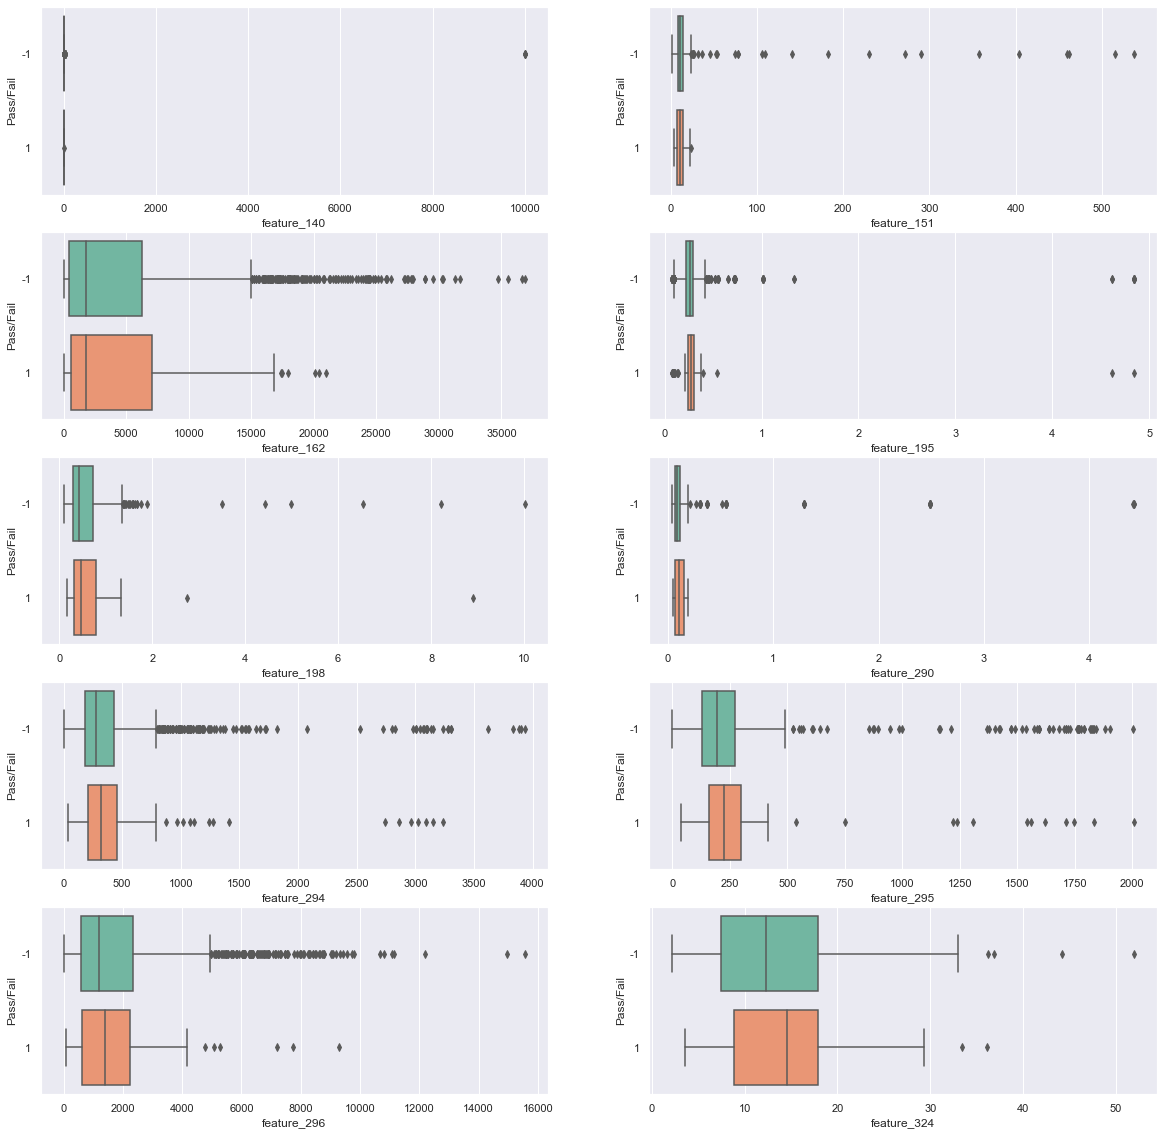

In [54]:
# Outlier detection in the first 10 features
fig, axes = plt.subplots(5, 2,figsize=(20,20))
sns.set_style('whitegrid')
sns.boxplot(data = Signal_Data_New_2, x = 'feature_140', y='Pass/Fail', orient="h", palette="Set2", ax=axes[0,0])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_151', y='Pass/Fail', orient="h", palette="Set2", ax=axes[0,1])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_162', y='Pass/Fail', orient="h", palette="Set2", ax=axes[1,0])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_195', y='Pass/Fail', orient="h", palette="Set2", ax=axes[1,1])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_198', y='Pass/Fail', orient="h", palette="Set2", ax=axes[2,0])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_290', y='Pass/Fail', orient="h", palette="Set2", ax=axes[2,1])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_294', y='Pass/Fail', orient="h", palette="Set2", ax=axes[3,0])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_295', y='Pass/Fail', orient="h", palette="Set2", ax=axes[3,1])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_296', y='Pass/Fail', orient="h", palette="Set2", ax=axes[4,0])
sns.boxplot(data = Signal_Data_New_2, x = 'feature_324', y='Pass/Fail', orient="h", palette="Set2", ax=axes[4,1])

In [55]:
# Treatment of Outliers by replacing them with Median

# Function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75) + stats.iqr(var), var.quantile(0.50),var)
    return var

# Function to remove outliers on min side 
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var), var.quantile(0.50),var)
    return var

# Removing outliers from all columns except the target column 
Signal_Data_New_2.iloc[:, :-1] = outlier_removal_max(Signal_Data_New_2.iloc[:, :-1])
Signal_Data_New_2.iloc[:, :-1] = outlier_removal_min(Signal_Data_New_2.iloc[:, :-1])

In [56]:
Signal_Data_New_2.shape

(1567, 47)

In [57]:
# Q 3(A)
# Perform a detailed univariate Analysis with appropriate detailed comments after each analysis 

In [58]:
# Univariate data analysis 
Signal_Data_New_2.drop(['Pass/Fail'], axis=1).describe()

,feature_140,feature_151,feature_162,feature_195,feature_198,feature_290,feature_294,feature_295,feature_296,feature_324,...,feature_510,feature_511,feature_520,feature_523,feature_525,feature_526,feature_549,feature_554,feature_574,feature_589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.556075,11.749901,1962.796624,0.287084,0.557359,0.123427,274.497217,195.605450,1214.550424,13.332172,...,53.486769,151.292581,2.695999,0.453896,5.560397,1.443457,0.663256,0.503657,9.055713,81.710853
std,2.444064,7.257696,1128.863378,0.394682,0.536674,0.270120,116.546598,85.641047,427.028589,6.613737,...,28.713655,233.067633,5.702366,4.147581,3.890213,0.958428,0.614913,0.546884,26.611734,53.816675
min,0.031900,2.020000,322.000000,0.080000,0.090000,0.041600,53.397900,0.000000,472.928000,2.234500,...,0.000000,0.000000,0.312100,0.025800,1.540000,0.170500,0.044600,0.052000,1.039500,0.000000
25%,0.131800,8.096000,1549.500000,0.219500,0.296000,0.065200,187.776800,130.263200,975.384250,7.578800,...,35.324400,0.000000,1.552150,0.073050,4.117100,0.484200,0.289600,0.375000,2.567850,44.368600
50%,0.239300,11.000000,1787.000000,0.259000,0.427000,0.083900,278.794300,195.840700,1202.577400,12.510900,...,47.058800,0.000000,2.221000,0.100000,5.166100,1.550100,0.610500,0.503657,2.975800,72.023000
75%,0.440900,14.231000,1789.500000,0.296000,0.724500,0.118600,339.607050,259.939050,1250.761900,17.925150,...,63.583300,338.769100,2.903700,0.133200,6.301850,2.211650,0.773400,0.533550,3.492500,102.524100
max,26.077904,140.243000,6464.000000,4.838000,10.017000,4.420300,589.216600,435.211300,2488.414400,51.867800,...,221.621600,715.789500,111.736500,111.333000,80.040600,8.203700,7.065600,17.478100,156.858100,272.347700


<AxesSubplot:xlabel='feature_140', ylabel='Density'>

<AxesSubplot:xlabel='feature_151', ylabel='Density'>

<AxesSubplot:xlabel='feature_162', ylabel='Density'>

<AxesSubplot:xlabel='feature_195', ylabel='Density'>

<AxesSubplot:xlabel='feature_198', ylabel='Density'>

<AxesSubplot:xlabel='feature_290', ylabel='Density'>

<AxesSubplot:xlabel='feature_294', ylabel='Density'>

<AxesSubplot:xlabel='feature_295', ylabel='Density'>

<AxesSubplot:xlabel='feature_296', ylabel='Density'>

<AxesSubplot:xlabel='feature_324', ylabel='Density'>

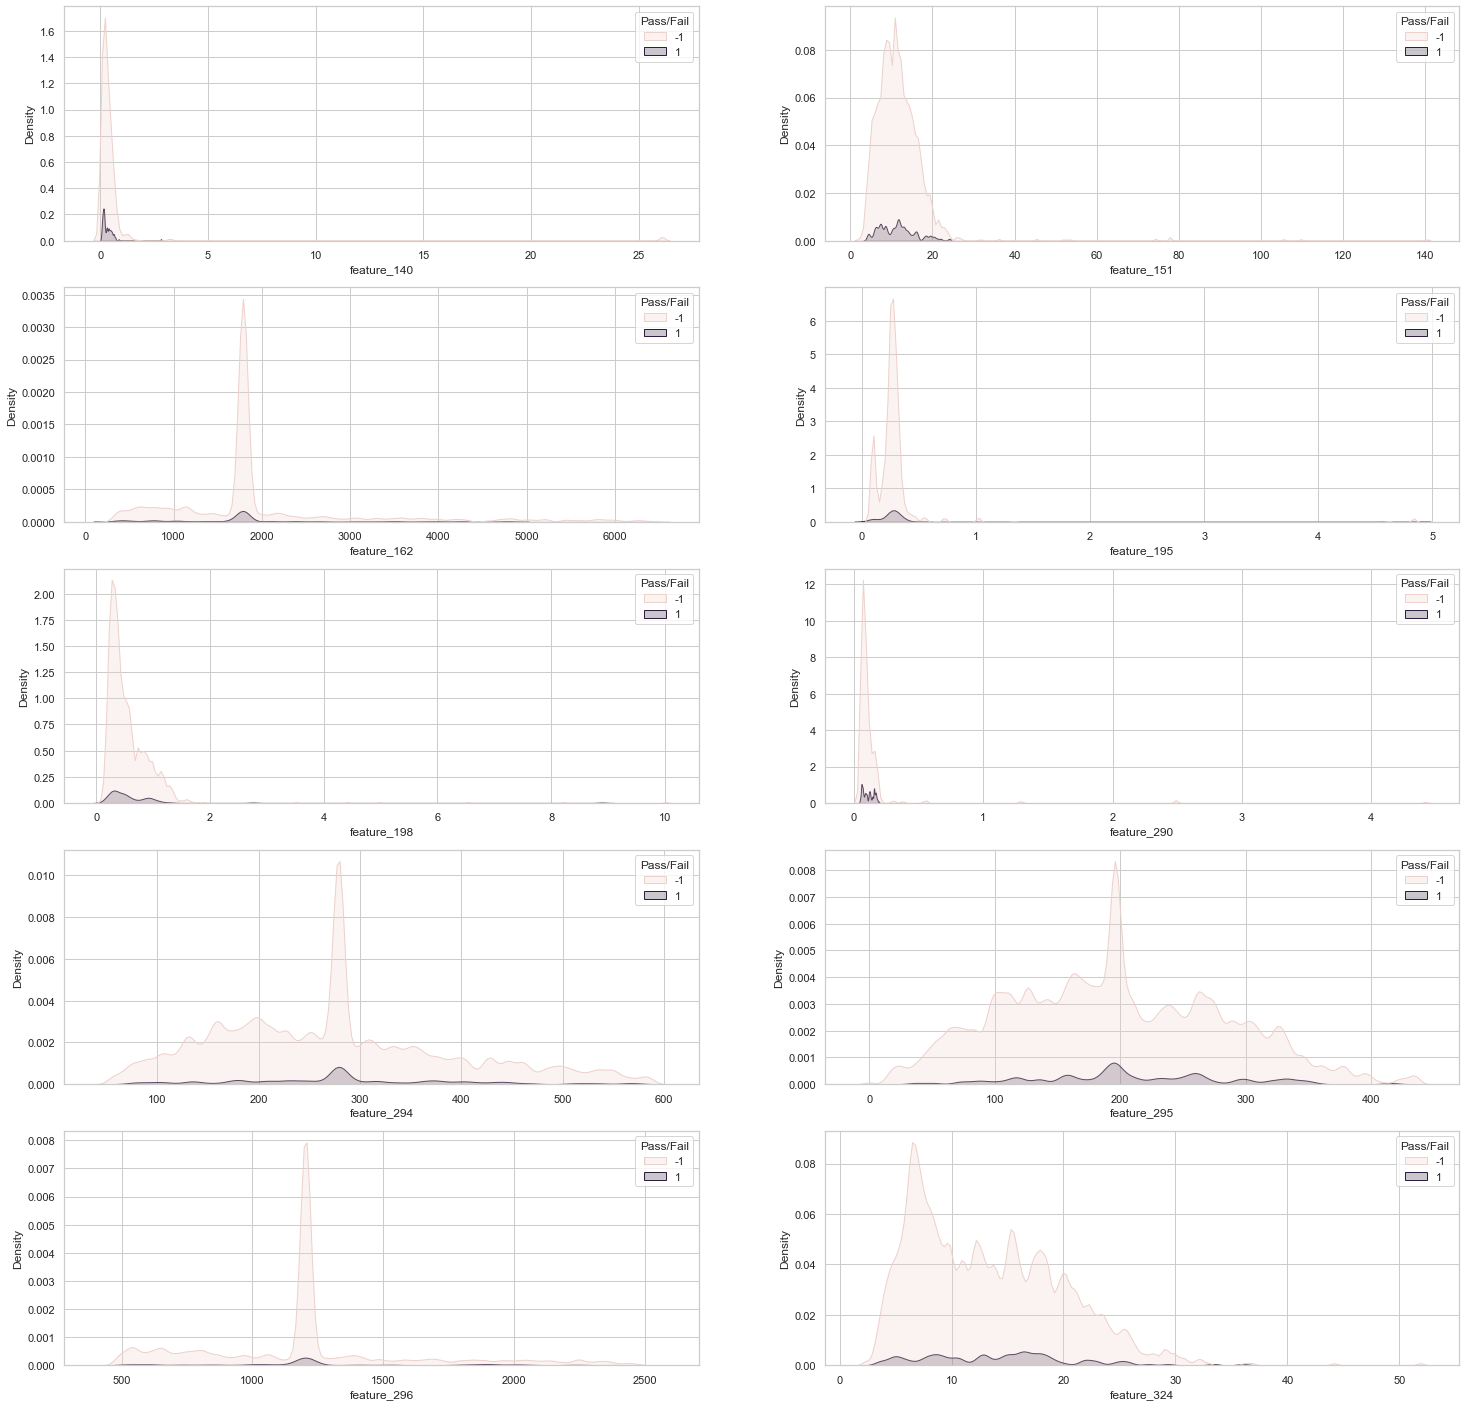

In [59]:
# Plotting univariate distributions of the first 10 features   
fig, axes = plt.subplots(5, 2,figsize=(25,25))
sns.kdeplot(data= Signal_Data_New_2, x="feature_140", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[0,0])
sns.kdeplot(data= Signal_Data_New_2, x="feature_151", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[0,1])
sns.kdeplot(data= Signal_Data_New_2, x="feature_162", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[1,0])
sns.kdeplot(data= Signal_Data_New_2, x="feature_195", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[1,1])
sns.kdeplot(data= Signal_Data_New_2, x="feature_198", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[2,0])
sns.kdeplot(data= Signal_Data_New_2, x="feature_290", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[2,1])
sns.kdeplot(data= Signal_Data_New_2, x="feature_294", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[3,0])
sns.kdeplot(data= Signal_Data_New_2, x="feature_295", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[3,1])
sns.kdeplot(data= Signal_Data_New_2, x="feature_296", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[4,0])
sns.kdeplot(data= Signal_Data_New_2, x="feature_324", hue="Pass/Fail", bw_adjust=.2, multiple="layer", fill=True,ax=axes[4,1])
plt.show()

In [60]:
# Barring a few, the distributions of the study features exhibit some degree of normality though most of them are either 
# bimodal or multi modal. This means that distributions exhibit more than one local maximum.
# However, the distributions are not uniform as their peaks have different heights.   

In [61]:
# Q 3(B)
# Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<AxesSubplot:xlabel='feature_140', ylabel='feature_151'>

<AxesSubplot:xlabel='feature_151', ylabel='feature_162'>

<AxesSubplot:xlabel='feature_162', ylabel='feature_195'>

<AxesSubplot:xlabel='feature_195', ylabel='feature_198'>

<AxesSubplot:xlabel='feature_198', ylabel='feature_290'>

<AxesSubplot:xlabel='feature_290', ylabel='feature_294'>

<AxesSubplot:xlabel='feature_294', ylabel='feature_295'>

<AxesSubplot:xlabel='feature_295', ylabel='feature_296'>

<AxesSubplot:xlabel='feature_296', ylabel='feature_324'>

<AxesSubplot:xlabel='feature_324', ylabel='feature_340'>

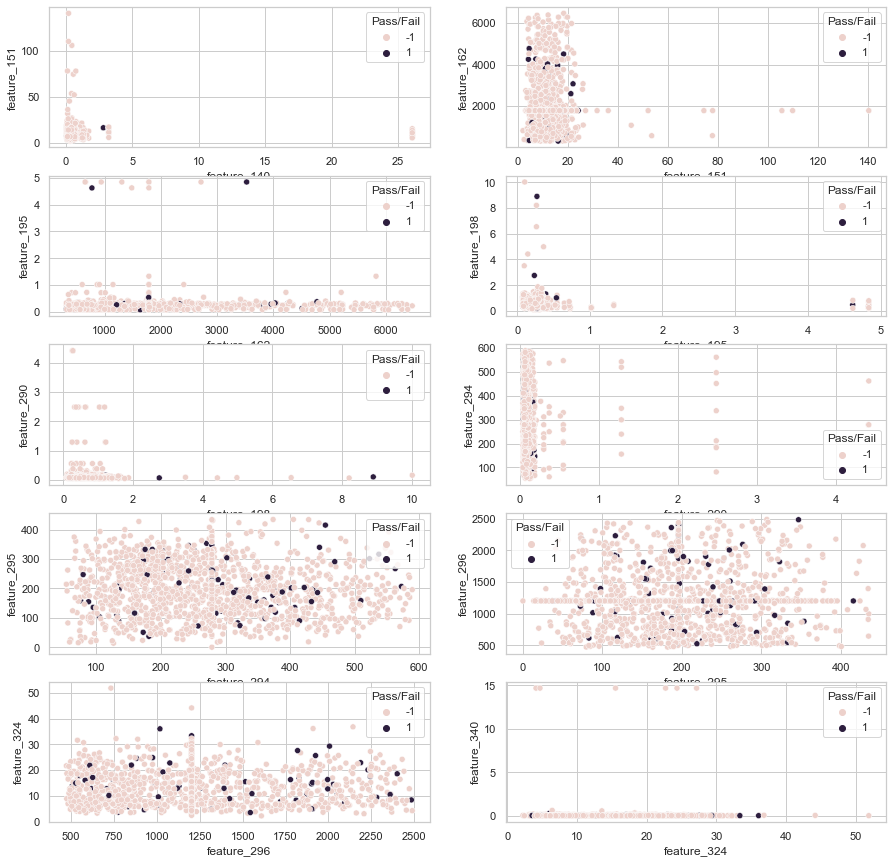

In [62]:
# Plotting bivariate distributions on a few selected features 
fig, axes = plt.subplots(5, 2,figsize=(15,15))
sns.scatterplot(data= Signal_Data_New_2, x="feature_140", y="feature_151",hue="Pass/Fail", ax=axes[0,0])
sns.scatterplot(data= Signal_Data_New_2, x="feature_151", y="feature_162",hue="Pass/Fail", ax=axes[0,1])
sns.scatterplot(data= Signal_Data_New_2, x="feature_162", y="feature_195",hue="Pass/Fail", ax=axes[1,0])
sns.scatterplot(data= Signal_Data_New_2, x="feature_195", y="feature_198",hue="Pass/Fail", ax=axes[1,1])
sns.scatterplot(data= Signal_Data_New_2, x="feature_198", y="feature_290",hue="Pass/Fail", ax=axes[2,0])
sns.scatterplot(data= Signal_Data_New_2, x="feature_290", y="feature_294",hue="Pass/Fail", ax=axes[2,1])
sns.scatterplot(data= Signal_Data_New_2, x="feature_294", y="feature_295",hue="Pass/Fail", ax=axes[3,0])
sns.scatterplot(data= Signal_Data_New_2, x="feature_295", y="feature_296",hue="Pass/Fail", ax=axes[3,1])
sns.scatterplot(data= Signal_Data_New_2, x="feature_296", y="feature_324",hue="Pass/Fail", ax=axes[4,0])
sns.scatterplot(data= Signal_Data_New_2, x="feature_324", y="feature_340",hue="Pass/Fail", ax=axes[4,1])

In [63]:
# Observation 
# The study features exhibit no multicollinearity with some of their intersection points forming a cloud. 

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation heatmap for the Data')

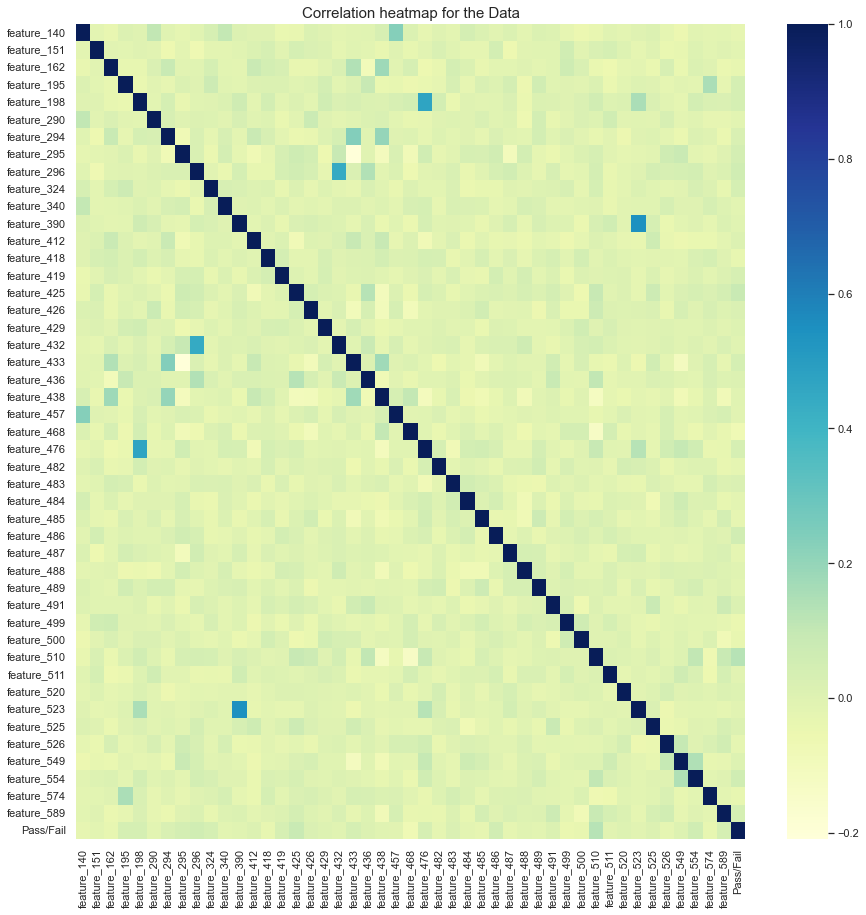

In [64]:
# Multivariate plotting 
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(Signal_Data_New_2.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 15)

In [65]:
# Observation
# Majority of the features exhibit low multicollinearity as we have dropped features with Variance Inflation Factor > 5.   

In [66]:
# Q 4(A)
# Segregate predictors vs target attributes

In [67]:
Signal_Data_New_2.shape

(1567, 47)

In [68]:
# Solution
Predictors = Signal_Data_New_2.drop(['Pass/Fail'],axis=1)
Target = Signal_Data_New_2['Pass/Fail']
X = Predictors
Y = Target

In [69]:
# Q 4(B)
# Check for target balancing and fix it if found imbalanced

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

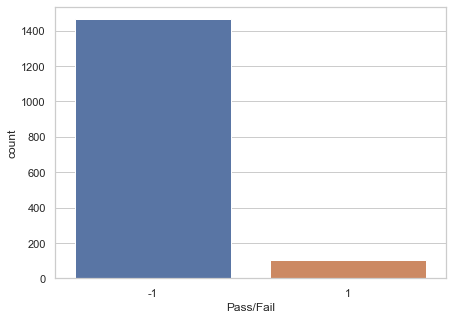

In [70]:
# Solution
# Distribution of the target variable
ax = plt.subplots(figsize=(7,5))   
sns.countplot(x="Pass/Fail", data=Signal_Data_New_2)

In [71]:
# The distribution of the target variable is Imbalanced. Here, SMOTE that is, 
# Synthetic Minority Over Sampling Technique will be used for balancing the distribution.  
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1) 
X_res, # Map the images from train folder with train labels to form a DataFrame.
# Summarize the new class distribution 
counter = Counter(Y_res)
print (counter) 

Counter({-1: 1463, 1: 1463})


In [72]:
X_res.shape, Y_res.shape

((2926, 46), (2926,))

In [73]:
# Q 4(C)
# Perform train-test split and standardise the data or vice versa if required

In [74]:
# Standardisation from scipy.stats import zscore
numeric_cols = X_res.columns
numeric_cols
X_res[numeric_cols] = X_res[numeric_cols].apply(zscore)
X_res

Index(['feature_140', 'feature_151', 'feature_162', 'feature_195',
       'feature_198', 'feature_290', 'feature_294', 'feature_295',
       'feature_296', 'feature_324', 'feature_340', 'feature_390',
       'feature_412', 'feature_418', 'feature_419', 'feature_425',
       'feature_426', 'feature_429', 'feature_432', 'feature_433',
       'feature_436', 'feature_438', 'feature_457', 'feature_468',
       'feature_476', 'feature_482', 'feature_483', 'feature_484',
       'feature_485', 'feature_486', 'feature_487', 'feature_488',
       'feature_489', 'feature_491', 'feature_499', 'feature_500',
       'feature_510', 'feature_511', 'feature_520', 'feature_523',
       'feature_525', 'feature_526', 'feature_549', 'feature_554',
       'feature_574', 'feature_589'],
      dtype='object')

,feature_140,feature_151,feature_162,feature_195,feature_198,feature_290,feature_294,feature_295,feature_296,feature_324,...,feature_510,feature_511,feature_520,feature_523,feature_525,feature_526,feature_549,feature_554,feature_574,feature_589
0,-0.029078,-0.235665,-1.458628,-0.025229,-0.514562,-0.054196,1.358272,2.573898,-1.752775,0.703527,...,0.108874,-0.643745,-0.175393,-0.085696,-0.680353,-1.057685,-0.421631,-0.303807,-0.208253,0.275118
1,-0.120480,0.241444,1.332621,-0.194848,-0.476859,-0.092860,-0.422547,-2.341504,-0.128675,1.634991,...,2.599460,-0.643745,-0.251796,-0.099474,-0.683042,-0.612606,0.076286,-0.102320,-0.257059,2.334586
2,-0.067093,-0.550151,0.203264,-0.395968,0.716471,0.000033,-0.253631,1.665768,-0.128675,0.371293,...,-0.462526,0.465713,0.033410,-0.096921,1.852279,-0.893851,-0.825820,-0.255604,-0.160439,-0.043853
3,-0.141902,0.611105,1.070671,-0.395968,1.310308,-0.135038,1.332824,-0.615886,0.722236,0.325991,...,1.695014,-0.643745,-0.078029,-0.089525,0.332056,-0.781282,2.030093,20.937551,-0.215927,-0.214953
4,-0.040399,0.143904,-0.427142,-0.127000,-0.094164,0.045224,0.400786,-1.000138,-1.055171,1.550828,...,2.814557,-0.643745,-0.054586,-0.101339,-0.721021,0.964187,0.613915,0.309327,-0.202904,-0.214953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,-0.110632,1.039657,-0.095998,0.010849,-0.232710,0.219779,0.874993,-0.432659,-1.252858,-0.783151,...,1.232537,-0.643745,-0.000764,-0.105151,0.196755,0.010469,-0.096785,0.182743,-0.200242,0.347436
2922,-0.139224,0.016012,0.365352,0.017452,0.269611,-0.084109,0.010767,0.255690,-0.128675,0.256211,...,-0.400377,-0.643745,0.059682,0.871079,0.545973,-1.050416,-0.300291,-0.085290,-0.229785,-1.563433
2923,-0.113088,-0.300040,-0.097067,-0.137072,-0.555734,-0.070549,0.512789,-0.818568,-1.487076,0.883256,...,2.918539,-0.643745,-0.270005,-0.085751,-0.223261,-0.781595,-0.661336,-0.045217,-0.256730,0.417963
2924,-0.075447,-0.444539,-0.139473,-0.130478,2.202073,-0.256475,0.689653,0.577762,-0.128675,-0.579641,...,-0.513116,-0.643745,0.047374,-0.099679,-0.444425,-0.635164,0.152431,-0.103262,-0.173185,1.697440


In [75]:
X = X_res 
Y = Y_res
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.3, stratify = Y_res, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape  

((2048, 46), (878, 46), (2048,), (878,))

In [76]:
# Q 4(D)
# Check if the train and test data have similar statistical characteristics when compared with original data.

In [77]:
# Solution
# Original data
Signal_Data_New_2.describe()

,feature_140,feature_151,feature_162,feature_195,feature_198,feature_290,feature_294,feature_295,feature_296,feature_324,...,feature_511,feature_520,feature_523,feature_525,feature_526,feature_549,feature_554,feature_574,feature_589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.556075,11.749901,1962.796624,0.287084,0.557359,0.123427,274.497217,195.605450,1214.550424,13.332172,...,151.292581,2.695999,0.453896,5.560397,1.443457,0.663256,0.503657,9.055713,81.710853,-0.867262
std,2.444064,7.257696,1128.863378,0.394682,0.536674,0.270120,116.546598,85.641047,427.028589,6.613737,...,233.067633,5.702366,4.147581,3.890213,0.958428,0.614913,0.546884,26.611734,53.816675,0.498010
min,0.031900,2.020000,322.000000,0.080000,0.090000,0.041600,53.397900,0.000000,472.928000,2.234500,...,0.000000,0.312100,0.025800,1.540000,0.170500,0.044600,0.052000,1.039500,0.000000,-1.000000
25%,0.131800,8.096000,1549.500000,0.219500,0.296000,0.065200,187.776800,130.263200,975.384250,7.578800,...,0.000000,1.552150,0.073050,4.117100,0.484200,0.289600,0.375000,2.567850,44.368600,-1.000000
50%,0.239300,11.000000,1787.000000,0.259000,0.427000,0.083900,278.794300,195.840700,1202.577400,12.510900,...,0.000000,2.221000,0.100000,5.166100,1.550100,0.610500,0.503657,2.975800,72.023000,-1.000000
75%,0.440900,14.231000,1789.500000,0.296000,0.724500,0.118600,339.607050,259.939050,1250.761900,17.925150,...,338.769100,2.903700,0.133200,6.301850,2.211650,0.773400,0.533550,3.492500,102.524100,-1.000000
max,26.077904,140.243000,6464.000000,4.838000,10.017000,4.420300,589.216600,435.211300,2488.414400,51.867800,...,715.789500,111.736500,111.333000,80.040600,8.203700,7.065600,17.478100,156.858100,272.347700,1.000000


In [78]:
# Train data 
X_train.describe()

,feature_140,feature_151,feature_162,feature_195,feature_198,feature_290,feature_294,feature_295,feature_296,feature_324,...,feature_510,feature_511,feature_520,feature_523,feature_525,feature_526,feature_549,feature_554,feature_574,feature_589
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,-0.008082,0.005289,0.006215,-0.007368,0.013111,-0.013750,-0.016637,-0.005819,0.004422,0.010434,...,0.009161,-0.004835,0.014586,0.013505,0.001684,0.030976,0.008203,0.014371,0.006112,-0.004198
std,0.958548,1.062452,1.014906,0.977942,1.020435,0.918471,0.992504,0.999360,1.005108,0.996170,...,1.017329,0.996630,1.136420,1.185725,1.008687,1.003658,1.045119,1.064832,1.008124,1.017164
min,-0.230474,-1.647347,-1.502766,-0.538933,-0.902913,-0.386099,-2.168927,-2.491271,-1.806183,-1.915519,...,-1.989299,-0.643745,-0.533516,-0.113055,-1.128651,-1.454452,-1.059045,-0.636273,-0.302166,-1.616146
25%,-0.163198,-0.541591,-0.353372,-0.172399,-0.478410,-0.239035,-0.710079,-0.652088,-0.443278,-0.830520,...,-0.696829,-0.643745,-0.251526,-0.097177,-0.376290,-0.970330,-0.499120,-0.248107,-0.230101,-0.709034
50%,-0.107616,-0.094760,-0.097067,-0.090653,-0.226910,-0.116962,0.010767,-0.103470,-0.128675,-0.001206,...,-0.245529,-0.643745,-0.114594,-0.088576,-0.135797,0.065125,-0.113450,-0.096425,-0.210718,-0.249491
75%,-0.013151,0.402185,-0.094939,-0.021653,0.288433,0.070832,0.537824,0.700372,0.274817,0.676211,...,0.406734,0.635185,0.037773,-0.076302,0.160452,0.798612,0.113798,-0.034666,-0.187851,0.391639
max,14.224098,21.964331,4.313855,10.990338,15.701900,21.600299,3.012702,3.058000,2.790051,3.827464,...,5.089382,2.607260,23.299493,36.314675,20.790658,8.034417,10.755335,20.937551,6.931741,3.551719


In [79]:
len(Y_train)

2048

In [80]:
# Test data
X_test.describe()

,feature_140,feature_151,feature_162,feature_195,feature_198,feature_290,feature_294,feature_295,feature_296,feature_324,...,feature_510,feature_511,feature_520,feature_523,feature_525,feature_526,feature_549,feature_554,feature_574,feature_589
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,0.018852,-0.012336,-0.014496,0.017186,-0.030582,0.032073,0.038807,0.013573,-0.010315,-0.024338,...,-0.021370,0.011277,-0.034023,-0.031500,-0.003929,-0.072253,-0.019134,-0.033522,-0.014256,0.009793
std,1.091453,0.837508,0.965339,1.050568,0.951090,1.168712,1.017344,1.002499,0.989051,1.009594,...,0.959184,1.008863,0.565994,0.230981,0.980576,0.988791,0.886782,0.829586,0.981791,0.959859
min,-0.219708,-1.466787,-1.501807,-0.538933,-0.857668,-0.386099,-2.039074,-2.693076,-1.801598,-1.774302,...,-1.530367,-0.643745,-0.512747,-0.111845,-1.058015,-1.434962,-1.056690,-0.656099,-0.277770,-1.616146
25%,-0.161991,-0.564542,-0.407232,-0.170617,-0.466971,-0.246007,-0.666648,-0.648972,-0.454126,-0.808713,...,-0.710011,-0.643745,-0.270120,-0.096928,-0.380099,-1.044012,-0.502740,-0.247951,-0.231024,-0.649748
50%,-0.110103,-0.072874,-0.097067,-0.085807,-0.236297,-0.126001,0.010767,-0.103470,-0.128675,-0.099667,...,-0.251409,-0.643745,-0.120027,-0.088772,-0.118795,-0.150091,-0.095630,-0.096425,-0.211645,-0.216657
75%,-0.015062,0.399009,-0.097067,-0.017278,0.223285,0.083887,0.601562,0.731157,0.211284,0.599299,...,0.396061,0.709994,0.031298,-0.076646,0.174228,0.738599,0.153632,-0.027369,-0.188590,0.456376
max,14.224098,10.707261,4.390617,10.990338,17.811435,21.600299,2.971666,3.061732,2.827542,6.323652,...,5.200982,2.603191,7.286063,4.462993,20.857877,5.518683,9.323702,11.230788,6.575469,3.551719


In [81]:
len(Y_test)

878

In [82]:
# The only difference is that the original data is not standardised whereas the train and test data are standardised by 
# applying Z score after rebalancing them with SMOTE 

In [83]:
# Q 5(A)
# Use any Supervised Learning technique to train a model

In [84]:
# Solution
# Train a base Support Vector Machine Model 
svc = SVC(random_state=1)
svc.fit(X_train, Y_train) 
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, Y_test))) 

SVC(random_state=1)

Accuracy on training set: 0.98
Accuracy on test set: 0.96


In [85]:
# Q 5(B)
# Use cross validation techniques

In [86]:
# Solution
# K-Fold Cross Validation on test data
num_folds = 5
Kfold = KFold (n_splits = num_folds)
model = svc
results = cross_val_score(model, X_test, Y_test, cv = Kfold)
print (results)
print ("Accuracy: %.3f%%(%.3f%%)"%(results.mean()*100.0,results.std()*100.0))

[0.90340909 0.85227273 0.92045455 0.88       0.85714286]
Accuracy: 88.266%(2.623%)


In [87]:
# LOOCV Cross validation on test data 
loocv = LeaveOneOut()
scores = cross_val_score(svc, X_test, Y_test, cv=LeaveOneOut())
scores.mean()
scores.std()

0.908883826879271

0.2877742450542826

In [88]:
# Stratified cross validation on test data
k = 5
from sklearn.model_selection import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k)
results = cross_val_score(svc, X_test, Y_test, cv = stratified_kfold)
print('Accuracy Score')
print('Average: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Average:  0.8803896103896104
Standard deviation:  0.02625922160907006


In [89]:
# Bootsrapping on test data 
# Number of iterations for bootstrapping
bootstrap_iteration = 5
accuracy = []
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
for i in range(bootstrap_iteration):
    X_, Y_ = resample(X_train, Y_train)
    svc.fit(X_, Y_)
    Y_pred = svc.predict(X_test)
    acc = accuracy_score(Y_pred, Y_test)
    print(acc)

SVC(random_state=1)

0.9510250569476082


SVC(random_state=1)

0.9544419134396356


SVC(random_state=1)

0.9407744874715261


SVC(random_state=1)

0.9544419134396356


SVC(random_state=1)

0.94874715261959


In [90]:
# Q 5(C)
# Apply hyper-parameter tuning techniques to get the best accuracy.

In [91]:
# Solution
# Grid search CV 
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','sigmoid'],
              'degree': [0, 1, 2, 3]} 
 
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
 
# Fitting the model for grid search
grid.fit(X_train, Y_train)

# Print best parameter after tuning
print(grid.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.cv_results_['mean_test_score'])

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.546 total time=   0.8s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.529 total time=   0.8s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.561 total time=   0.7s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.499 total time=   0.7s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.499 total time=   0.8s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.451 total time=   0.4s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.456 total time=   0.5s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.410 total time=   0.4s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.399 total time=   0.4s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.450 total time=   0.4s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.6s
[C

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [0, 1, 2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

{'C': 10, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, degree=0, gamma=0.1, random_state=1)
[0.52682808 0.43309679 0.75049317 0.53707794 0.77685849 0.69677619
 0.56691037 0.59609637 0.52682808 0.43309679 0.75049317 0.53707794
 0.77685849 0.69677619 0.56691037 0.59609637 0.52682808 0.43309679
 0.75049317 0.53707794 0.77685849 0.69677619 0.56691037 0.59609637
 0.52682808 0.43309679 0.75049317 0.53707794 0.77685849 0.69677619
 0.56691037 0.59609637 0.83641839 0.4223615  0.98877452 0.47704216
 0.8974596  0.68797185 0.74559843 0.69970183 0.83641839 0.4223615
 0.98877452 0.47704216 0.8974596  0.68797185 0.74559843 0.69970183
 0.83641839 0.4223615  0.98877452 0.47704216 0.8974596  0.68797185
 0.74559843 0.69970183 0.83641839 0.4223615  0.98877452 0.47704216
 0.8974596  0.68797185 0.74559843 0.69970183 0.84862663 0.42235792
 0.98975133 0.45846264 0.95996422 0.6269223  0.80371519 0.71971614
 0.84862663 0.42235792 0.98975133 0.45846264 0.95996422 0.6269223
 0.80371519 0.71971614 0.84862

In [92]:
# Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'sigmoid'],
              'degree': [0, 1, 2, 3]} 

# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(svc, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=SVC(random_state=1),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [0, 1, 2, 3],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'sigmoid']})

{'kernel': 'rbf', 'gamma': 0.1, 'degree': 0, 'C': 100}


In [93]:
# Q 5(D)
# Use any other technique/method which can enhance the model performance.

In [94]:
X_res.shape, Y_res.shape

((2926, 46), (2926,))

In [95]:
# Solution
# We will use reshaped data, X_res and Y_res 

In [96]:
# Apply PCA on the data with 20 components
from sklearn.decomposition import PCA
pca = PCA(n_components = 20, random_state=1)

In [97]:
# Visualize Cumulative Variance Explained with Number of Components
# Covariance matrix
cov_matrix = np.cov(X_res.T)

In [98]:
# Identification of Eigen values and Eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [99]:
# Variance and Cumulative Variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  4.86189812   9.12205781  12.95143122  16.35464574  19.67970039
  22.92116735  25.89037992  28.82534509  31.69075958  34.48403088
  37.15972573  39.81097035  42.41458596  44.96320906  47.4538041
  49.84746354  52.17388478  54.48695052  56.76145176  58.93278137
  61.09067718  63.20283918  65.29493559  67.31178633  69.31082643
  71.26694881  73.20603742  75.02425626  76.80159239  78.5318544
  80.23124483  81.89496155  83.53416323  85.13838579  86.70175981
  88.24924419  89.74130772  91.10739553  92.45877398  93.73735466
  94.99213181  96.16276881  97.28183741  98.25082643  99.19769198
 100.        ]


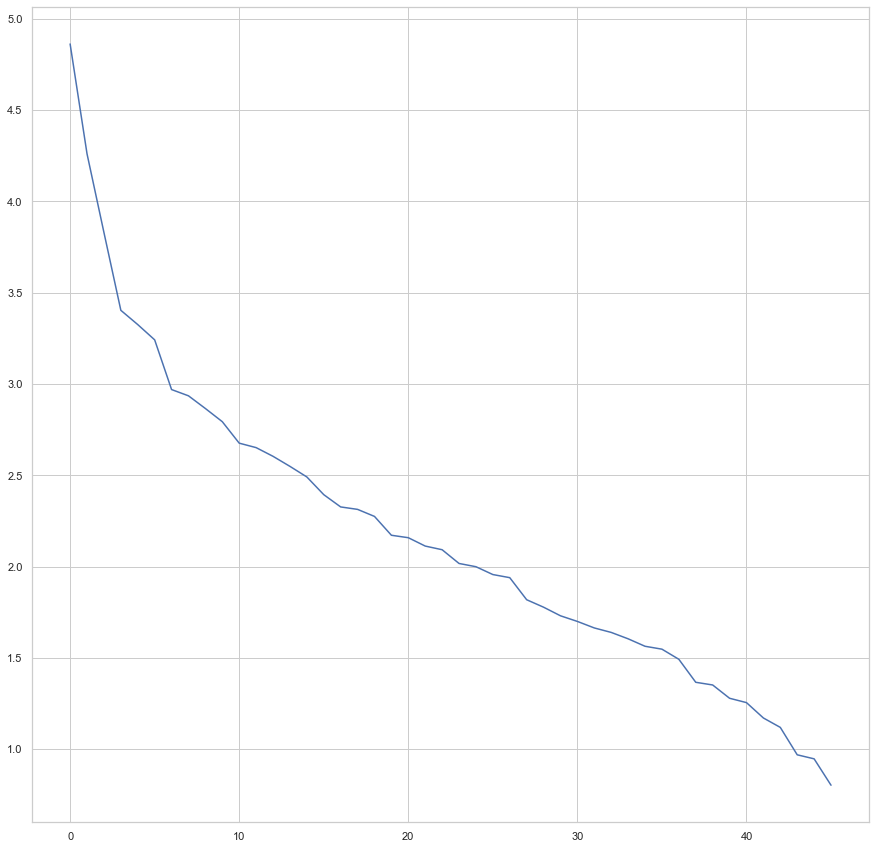

In [100]:
plt.plot(var_exp)

<Figure size 720x360 with 0 Axes>

<BarContainer object of 46 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

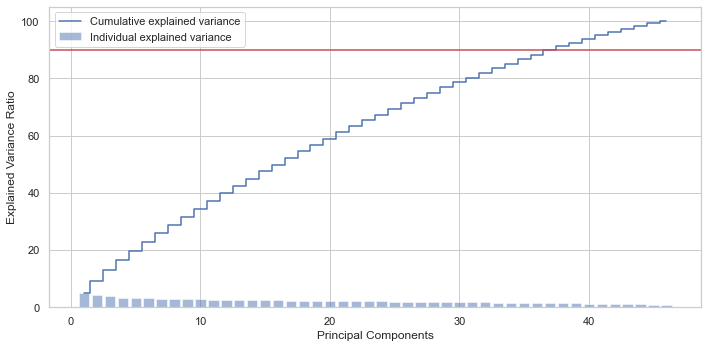

In [101]:
# Ploting while highlighting the threshold of 90%
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.axhline(y = 90, color = 'r', linestyle = '-')
plt.show()

In [102]:
# Selecting Minimum Components with 90% or above variance explained. 
# Minimum components that can explain 90% of the variance in the dataset is 35. 
# Applying PCA on the data with 5 principal components
pca = PCA(n_components=35, random_state=1)
Features =  X_res
Target = Y_res

In [103]:
cov_matrix = np.cov(Features, rowvar=False)
np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from lowest to highest with respect to eigenvalue
eig_pairs.sort()
# reverses the sorted pairs from increasing value of eigenvalue to lowest
eig_pairs.reverse()    
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)

(array([2.23723774, 1.96034343, 1.762114  , 1.56601388, 1.53004805,
        1.49158457, 0.36918787, 0.43570706, 0.44588734, 1.36630474,
        1.35054554, 1.31854129, 1.28534409, 0.51494754, 0.53867712,
        0.57739482, 0.58834819, 0.62184661, 0.62861523, 1.23124042,
        1.21998947, 1.19807264, 1.17276743, 1.1460654 , 0.68658388,
        1.10145978, 0.71208618, 0.71939791, 0.73819467, 0.75429056,
        0.76557134, 0.78198686, 0.79619263, 0.81785413, 0.83666661,
        1.07051964, 1.064374  , 1.04662827, 0.9991531 , 0.99297144,
        0.89228571, 0.90012393, 0.97192669, 0.96269336, 0.91987282,
        0.92806852]),
 array([[ 0.04445252, -0.02256925,  0.03378113, ...,  0.03795127,
         -0.05048081, -0.04313474],
        [ 0.00947184,  0.02383897, -0.00823413, ..., -0.0257977 ,
          0.04533744,  0.42241431],
        [ 0.19148183,  0.12229372, -0.0825731 , ..., -0.08762222,
         -0.17384551,  0.07345202],
        ...,
        [-0.30063849,  0.17681118, -0.02280083,

In [104]:
len(Y_res)

2926

In [105]:
Target = Y_res.reshape(len(Y_res), 1)
eigen_space = np.array(eigvectors_sort[0:35]).transpose()
proj_data_3D = np.dot(Features, eigen_space)

names = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16',
         'PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31',
         'PC32','PC33','PC34','PC35','Pass/Fail']

pca_array = np.concatenate((proj_data_3D, Target), axis=1)
pca_df = pd.DataFrame(pca_array ,columns=names )
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Pass/Fail
0,1.025527,-2.302121,1.864771,0.052328,-0.381250,0.972958,0.106869,1.296594,-0.378453,0.497864,...,-0.819469,-2.076926,1.361351,1.045300,-0.096789,-0.397903,-1.256830,0.544790,-1.434084,-1.0
1,0.198458,-0.944360,0.722724,-1.106205,-1.358355,0.488993,1.184267,-0.450780,1.922414,1.001323,...,-2.484654,-0.742447,-0.203351,1.356246,-0.486165,-1.745866,1.110224,0.519552,-1.029157,-1.0
2,0.167351,-1.681738,0.736148,-1.472311,-0.680635,-0.382130,0.533658,1.418130,-0.698623,-0.723715,...,0.071089,0.009445,0.026568,1.105391,-1.102205,-0.183332,-1.303892,0.433731,1.262057,1.0
3,-8.210433,3.942730,0.544739,3.314546,-7.213738,-0.347551,1.664493,0.736926,3.690746,-3.926780,...,2.526206,-0.618817,-4.159032,2.855949,-1.859899,-1.844626,0.749441,-2.051250,0.289306,-1.0
4,-0.939131,-2.291190,1.193859,0.007391,-1.435586,1.317808,0.576796,-0.241108,0.873636,0.368159,...,-0.927205,-1.282511,0.497578,0.297743,0.967889,0.093305,0.574469,-0.794154,-1.392284,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,1.871366,0.737299,-0.359324,-0.502808,0.205469,-0.509498,1.657458,0.209594,0.454132,-0.976172,...,-0.751241,-0.940627,-0.244308,-0.263225,-0.652391,-0.074450,-1.216058,0.266458,-0.411393,1.0
2922,0.392211,-0.484256,0.117032,-1.227343,-0.186978,-0.806591,-0.600079,1.370336,0.650254,-0.399440,...,0.798919,-0.943021,-0.176546,-1.334805,-0.977204,-0.602955,-0.181142,0.329145,-0.377750,1.0
2923,0.986607,0.259877,-0.729987,-1.180231,-1.287089,-0.019412,1.497302,-1.412588,0.060096,-0.017076,...,-1.196242,0.437375,-0.300395,0.452730,0.987666,-0.192297,0.091087,-0.383022,-0.227970,1.0
2924,-1.316788,0.893269,1.918900,-0.148029,1.118373,0.472035,1.106566,-0.553681,0.065491,-0.045023,...,-0.813050,-0.413912,-0.409903,-0.756798,-0.151395,1.083785,0.040552,0.678723,-0.039318,1.0


In [106]:
# Using the best hyper-parameters and Principal components on balanced data 
# Split into train and test
X = pca_df.drop(['Pass/Fail'], axis=1) # select only the Principal Components 
Y = pca_df['Pass/Fail'] # select only the Target 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((2048, 35), (878, 35), (2048,), (878,))

In [107]:
# Using the best hyper-parameters from Randomised Search CV 
svc = SVC(C=100, degree=0, gamma=0.1, kernel='rbf', random_state = 1) 
svc.fit(X_train, Y_train) 
Y_predict_SVC = svc.predict(X_test)
svc_score_train = svc.score(X_train, Y_train)
svc_score_test = svc.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, Y_test)))

SVC(C=100, degree=0, gamma=0.1, random_state=1)

Accuracy on training set: 1.00
Accuracy on test set: 0.99


In [108]:
# Q 5(E)
# Display and explain the classification report in detail.

<Figure size 504x360 with 0 Axes>

<AxesSubplot:>

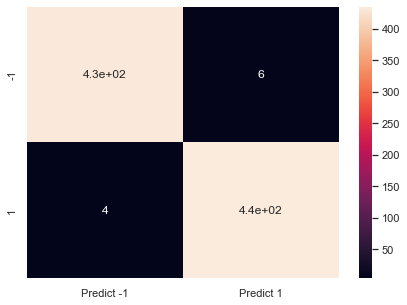

In [109]:
# Solution
# Confusion matrix for test data
cm = metrics.confusion_matrix(Y_test, Y_predict_SVC, labels=[-1,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["-1","1"]],
                  columns = [i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [110]:
print(classification_report(Y_test, Y_predict_SVC))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       439
         1.0       0.99      0.99      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



In [111]:
# Q 5(F)
# Apply the above steps for all possible models that you have learnt so far.

In [112]:
# Solution
# Using the principal components obtained above as predictors

In [113]:
# Logistic regression 
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, Y_train) 
Y_predict_LR = logreg.predict(X_test)

LogisticRegression(random_state=1)

In [114]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [10, 1.0, 0.1, 0.01]
param_dist = dict(solver=solvers,penalty=penalty,C=c_values)
           
# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(logreg, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=LogisticRegression(random_state=1),
                   param_distributions={'C': [10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}


In [115]:
# Using the best hyper-parameters from Randomised Search CV 
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 10, random_state=1)
logreg.fit(X_train, Y_train)
Y_predict_LR = logreg.predict(X_test)
lr_score_train = logreg.score(X_train, Y_train)
lr_score_test = logreg.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(logreg.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(logreg.score(X_test, Y_test)))

LogisticRegression(C=10, random_state=1, solver='liblinear')

Accuracy on training set: 0.72
Accuracy on test set: 0.72


In [116]:
print(classification_report(Y_test, Y_predict_LR))

              precision    recall  f1-score   support

        -1.0       0.73      0.68      0.71       439
         1.0       0.70      0.75      0.72       439

    accuracy                           0.72       878
   macro avg       0.72      0.72      0.71       878
weighted avg       0.72      0.72      0.71       878



In [117]:
# Decision Treee Classifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,Y_train)
Y_predict_DT = dt.predict(X_test) 

DecisionTreeClassifier(random_state=1)

In [118]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3,5,10],
              'min_samples_leaf': [5,10,20,50],
              'max_features':['auto','log2']}  

# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(dt, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [5, 10, 20, 50]})

{'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}


In [119]:
# Using the best hyper-parameters from Randomised Search CV 
dt = DecisionTreeClassifier(min_samples_leaf = 10, max_features = 'auto', max_depth = 10, criterion = 'entropy', 
                            random_state=1)
dt.fit(X_train,Y_train)
Y_predict_DT = dt.predict(X_test) 
dt_score_train = dt.score(X_train, Y_train)
dt_score_test = dt.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(dt.score(X_test, Y_test)))

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=10, random_state=1)

Accuracy on training set: 0.85
Accuracy on test set: 0.77


In [120]:
print(classification_report(Y_test, Y_predict_DT ))

              precision    recall  f1-score   support

        -1.0       0.84      0.67      0.75       439
         1.0       0.73      0.87      0.79       439

    accuracy                           0.77       878
   macro avg       0.78      0.77      0.77       878
weighted avg       0.78      0.77      0.77       878



In [121]:
# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, Y_train)
Y_predict_RF = rf.predict(X_test)

RandomForestClassifier(random_state=1)

In [122]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'max_features': ['sqrt', 'log2'],
              "min_samples_split": sp_randint(2, 11),
              'max_depth': [2,3,5,10],
              'criterion': ['gini','entropy'],
              "bootstrap": [True, False],
              'min_samples_leaf': sp_randint(1, 11)}  
# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000071DB87F8B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000071DB868370>})

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6}


In [123]:
# Using the best hyper-parameters from Randomised Search CV  
rf = RandomForestClassifier(bootstrap = 'False', criterion = 'gini', max_depth = 10, max_features = 'log2',
                            min_samples_leaf = 2, min_samples_split = 3, random_state=1)
rf.fit(X_train, Y_train)
Y_predict_RF = rf.predict(X_test)
rf_score_train = rf.score(X_train, Y_train)
rf_score_test = rf.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(rf.score(X_test, Y_test)))

RandomForestClassifier(bootstrap='False', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3, random_state=1)

Accuracy on training set: 0.99
Accuracy on test set: 0.93


In [124]:
print(classification_report(Y_test, Y_predict_RF))

              precision    recall  f1-score   support

        -1.0       0.97      0.89      0.93       439
         1.0       0.90      0.97      0.93       439

    accuracy                           0.93       878
   macro avg       0.93      0.93      0.93       878
weighted avg       0.93      0.93      0.93       878



In [125]:
ac = AdaBoostClassifier(random_state=1)
ac.fit(X_train, Y_train)
Y_predict_AB = ac.predict(X_test)

AdaBoostClassifier(random_state=1)

In [126]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'n_estimators': [10,20,30,40],
              'learning_rate': [0.1,0.3,0.5,1]}  

# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(ac, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=1),
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 1],
                                        'n_estimators': [10, 20, 30, 40]})

{'n_estimators': 40, 'learning_rate': 1}


In [127]:
# Using the best hyper-parameters from Randomised Search CV  
ac = AdaBoostClassifier(n_estimators = 40, learning_rate = 1, random_state = 1)
ac.fit(X_train, Y_train)
Y_predict_AB = ac.predict(X_test)
ac_score_train = ac.score(X_train, Y_train)
ac_score_test = ac.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(ac.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(ac.score(X_test, Y_test)))

AdaBoostClassifier(learning_rate=1, n_estimators=40, random_state=1)

Accuracy on training set: 0.86
Accuracy on test set: 0.82


In [128]:
print(classification_report(Y_test, Y_predict_AB))

              precision    recall  f1-score   support

        -1.0       0.83      0.80      0.82       439
         1.0       0.81      0.84      0.82       439

    accuracy                           0.82       878
   macro avg       0.82      0.82      0.82       878
weighted avg       0.82      0.82      0.82       878



In [129]:
# XG Boost
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,Y_train) 
Y_predict_XGB = xgb.predict(X_test) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'max_depth': [2,3,5,10],
              'n_estimators': [10,20,30,40],
              'learning_rate': [0.1,0.3,0.5,1],
              'reg_alpha': [0.1,0.2,0.5,1],
              'reg_lambda': [0.1,0.2,0.5,1],
              'gamma' : [0.1,0.2,0.5,1]}  

# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(xgb, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1...
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=1,
                

{'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 40, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.2}


In [131]:
# Using the best hyper-parameters from Randomised Search CV
xgb = XGBClassifier(base_score = 0.5, booster = 'gbtree',
                                           colsample_bylevel = 1,
                                           colsample_bynode = 1,
                                           colsample_bytree = 1,
                                           enable_categorical = False, gamma = 1,
                                           gpu_id = -1, importance_type = None,
                                           interaction_constraints = '',
                                           learning_rate = 0.3,
                                           max_delta_step = 0, max_depth = 10,
                                           min_child_weight = 1,
                                           monotone_constraints = '()',
                                           n_estimators = 30, 
                                           num_parallel_tree = 1,
                                           predictor = 'auto', random_state = 1,
                                           reg_alpha = 0.1, reg_lambda = 1,
                                           scale_pos_weight = 1, subsample = 1,
                                           tree_method = 'exact',
                                           validate_parameters = 1,
                                           verbosity = None)
xgb.fit(X_train,Y_train) 
Y_predict_XGB = xgb.predict(X_test)
xgb_score_train = xgb.score(X_train, Y_train)
xgb_score_test = xgb.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(xgb.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(xgb.score(X_test, Y_test)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy on training set: 1.00
Accuracy on test set: 0.95


In [132]:
print(classification_report(Y_test, Y_predict_XGB))

              precision    recall  f1-score   support

        -1.0       0.98      0.92      0.95       439
         1.0       0.92      0.98      0.95       439

    accuracy                           0.95       878
   macro avg       0.95      0.95      0.95       878
weighted avg       0.95      0.95      0.95       878



In [133]:
# K-Nearest Neighbours 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predict_KNN = knn.predict(X_test)

KNeighborsClassifier(n_neighbors=3)

In [134]:
# Hyper-parameter tuning using Randomised search CV with default 5-fold cross validation
# Defining parameter range
param_dist = {'n_neighbors': [3,5,10],
              'weights': ['uniform','distance'],
              'algorithm': ['auto', 'kd_tree'],
              'metric': ['euclidean','minkowski','manhattan']}  

# Number of random samples 
samples = 10  
randomCV = RandomizedSearchCV(knn, param_distributions = param_dist, n_iter = samples) 

randomCV.fit(X_train, Y_train) 
print(randomCV.best_params_)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'metric': ['euclidean', 'minkowski',
                                                   'manhattan'],
                                        'n_neighbors': [3, 5, 10],
                                        'weights': ['uniform', 'distance']})

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski', 'algorithm': 'kd_tree'}


In [135]:
# Using the best hyper-parameters from Randomised Search CV
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean', algorithm = 'kd_tree' )
knn.fit(X_train, Y_train)
Y_predict_KNN = knn.predict(X_test)
knn_score_train = knn.score(X_train, Y_train)
knn_score_test = knn.score(X_test, Y_test)
print("Accuracy on training set: {:.2f}".format(knn.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, Y_test)))

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=3)

Accuracy on training set: 0.85
Accuracy on test set: 0.80


In [136]:
print(classification_report(Y_test, Y_predict_KNN))

              precision    recall  f1-score   support

        -1.0       1.00      0.60      0.75       439
         1.0       0.71      1.00      0.83       439

    accuracy                           0.80       878
   macro avg       0.86      0.80      0.79       878
weighted avg       0.86      0.80      0.79       878



In [137]:
# Q 6(A)
# Display and compare all the models designed with their train and test accuracies

In [138]:
# Solution
result = pd.DataFrame({'Model': ['Support Vector Machines','Logistic Regression', 'DecisionTree', 
                                  'Random Forest', 'Ada Boost', 'XG Boost', 'K-Nearest Neighbour'], 
                       'Training Accuracy': [svc_score_train, lr_score_train, dt_score_train, rf_score_train, 
                                              ac_score_train, xgb_score_train, knn_score_train],
                       'Test Accuracy': [svc_score_test, lr_score_train, dt_score_test, rf_score_test, 
                                          ac_score_test, xgb_score_test, knn_score_test]})
result

,Model,Training Accuracy,Test Accuracy
0,Support Vector Machines,1.000000,0.988610
1,Logistic Regression,0.717285,0.717285
2,DecisionTree,0.854004,0.773349
3,Random Forest,0.991699,0.931663
4,Ada Boost,0.859375,0.818907
5,XG Boost,1.000000,0.949886
6,K-Nearest Neighbour,0.854492,0.799544


In [139]:
# Q 6(B)
# Select the final best trained model along with your detailed comments for selecting this model.

In [140]:
# Solution
# The best trained model selected is Support Vector Machines 
# Parameters of the model are C = 100, degree = 0, gamma = 0.1, kernel = 'rbf' 
# 1. The SVC model with the above parameters achived a training accuracy of 100% and a test accuracy of nearly 99%
# 2. The XG Boost algorithm achieved a training accuracy of 100% too but got a test accuracy of nearly 95%
# 3. The Random Forest classifier algorithm achieved a training accuracy of nearly 100% but its test accuracy is a mere 93%
# Besides accuracy, classification scores of the Support Vector Machine model is robust

# For Class -1 (Pass)
# Precision: 0.99, Recall: 0.99, f1 score: 0.99

# For Class 1 (Fail)
# Precision: 0.99, Recall: 0.99, f1 score: 0.99           

In [141]:
# Q 6(C)
# Pickle the selected model for future use.

In [142]:
# Solution
# Best optimised model 
Model = SVC(C=100, degree=0, gamma=0.1, kernel='rbf', random_state = 1)
Model.fit(X_train, Y_train)

import pickle
# Save the model to disk
filename = 'Final_Model.sav'
pickle.dump(Model, open(filename,'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

SVC(C=100, degree=0, gamma=0.1, random_state=1)

0.9886104783599089


In [143]:
# Q 6(D)
# Write your conclusion on the results.

In [144]:
# Solution
# It has been observed that 90% of the outcome (Pass/Fail) of a semi conductor manufacturing process is influenced by a
# few signals (in this case, the number of signals in terms of principal components) could explain 90% of the 
# variance in outcome. 
# It is imperative to remove noise from the data and incorporate only the useful information which in turn, is expected 
# to produce superior model outcomes.  